# 📖 Comparative Literary Translation Analysis: Lexical Diversity and Frequencies

## 🔍 Research Objectives  
This notebook presents a **minimum viable product (MVP)** for a larger research project exploring lexical diversity in literary translations. The goal is to **test methods and materials** rather than reach definitive conclusions.  

The workflow follows a **modular structure**, encompassing:  
- **Text collection & preprocessing**  
- **Exploratory data analysis (EDA)**  
- **Lexical diversity experiments**  
- **Statistical hypothesis testing**  
- **Discussion of preliminary findings**  

For this iteration, we analyze **two modern English translations** of *The Odyssey*:  
➡️ **Emily Wilson's translation**  
➡️ **Peter Green's translation**  

---

## 🛤️ Methodology Roadmap (Table of Contents)  

### 1️⃣ Libraries & Text Acquisition  
📌 Setting up the environment and loading texts.  

### 2️⃣ Experiment 1: **Type-Token Ratio (TTR)**  
- 📌 **Implementation:** Computing TTR for both translations.  
- 📊 **Parametric Hypothesis Testing:** Comparing TTR statistically.  

### 3️⃣ Experiment 2: **Zipf’s Law Verification**  
- 📌 **Implementation:** Examining word frequency distributions.  
- 📊 **Parametric Hypothesis Testing:** Evaluating Zipfian behavior.  

### 4️⃣ Experiment 3: **TF-IDF Analysis**  
- 📌 **Implementation:** Identifying key lexical differences.  
- 📊 **Parametric Hypothesis Testing:** Assessing significant variations.  

### 5️⃣ Discussion of Results  
- 🔎 **Findings:** Insights from experiments.  
- 🚀 **New Directions:** Refinements & future research steps.  

____________________________________________________
## 1️⃣ Libraries & Text Acquisition 

In [29]:
# Libraries
%matplotlib inline
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from tqdm import tqdm
tqdm.pandas()
pd.options.display.max_colwidth = 150 ###
import numpy as np
import re
import sys
import os
import matplotlib.pyplot as plt
# Add the directory containing visualization_utils.py to path
sys.path.append("/Users/debr/English-Homer/")
import visualization_utils as viz
import seaborn as sns
sns.set_style("whitegrid")
# palette astroblue   orange   genoa      carrot    tawny     neptune      SELAGO    mako   black
color = ['#003D59', '#FD6626','#177070','#FB871D','#641B5E','#86C3BC','#F5E1FD','#414A4F','k']
danB_plotstyle = {'figure.figsize': (12, 7), 
               'axes.labelsize': 'large', # fontsize for x and y labels (was large)
               'axes.titlesize': 'large', # fontsize for title
               'axes.titleweight': 'bold', # font type for title
               'xtick.labelsize': 'large', # fontsize for x 
               'ytick.labelsize':'small', # fontsize fory ticks
               'grid.color': 'k', # grid color
                'grid.linestyle': ':', # grid line style
                'grid.linewidth': 0.2, # grid line width
                'font.family': 'Times New Roman', # font family
                'grid.alpha': 0.5, # transparency of grid
               'figure.dpi': 300, # figure display resolution
               'savefig.bbox': 'tight', # tight bounding box
               'savefig.pad_inches': 0.4, # padding to use when saving
               'axes.titlepad': 15, # title padding
               'axes.labelpad': 8, # label padding
               'legend.borderpad': .6, # legend border padding
               'axes.prop_cycle': plt.cycler(
                color=color) # color cycle for plot lines
               }

# adjust matplotlib defaults
plt.rcParams.update(danB_plotstyle)

In [30]:
# Load CSVs
filepath_Wilson = "/Users/debr/odysseys_en/Odyssey_dfs/Odyssey_Wilson_eda_END.csv"
filepath_Green = "/Users/debr/odysseys_en/Odyssey_dfs/Odyssey_Green_eda_END.csv"

df_W = pd.read_csv(filepath_Wilson)
df_G = pd.read_csv(filepath_Green)

# Add translation label
df_W["translation"] = "Wilson"
df_G["translation"] = "Green"

# Keep only necessary columns: book number & tokens
df_W = df_W[["book_num", "tokens", "translation"]]
df_G = df_G[["book_num", "tokens", "translation"]]

# Combine both into one DataFrame
df = pd.concat([df_W, df_G], ignore_index=True)

# Ensure tokens are stored as lists (if stored as strings, convert them)
df["tokens"] = df["tokens"].apply(lambda x: eval(x) if isinstance(x, str) else x)

df

book_num  \
0          1   
1          2   
2          3   
3          4   
4          5   
5          6   
6          7   
7          8   
8          9   
9         10   
10        11   
11        12   
12        13   
13        14   
14        15   
15        16   
16        17   
17        18   
18        19   
19        20   
20        21   
21        22   
22        23   
23        24   
24         1   
25         2   
26         3   
27         4   
28         5   
29         6   
30         7   
31         8   
32         9   
33        10   
34        11   
35        12   
36        13   
37        14   
38        15   
39        16   
40        17   
41        18   
42        19   
43        20   
44        21   
45        22   
46        23   
47        24   

                                                                                                                                                   tokens  \
0   [tell, complicated, man, muse, tell, wandered, lost, wrecked, holy, town, troy, went, met, pain, suﬀered, storms, sea, worked, save, life, bring, ...   
1   [dangerous, journey, early, dawn, born, fingers, bloomed, odysseus, well-beloved, son, jumped, put, clothes, strapped, sword, across, back, tied, ...   
2   [old, king, remembers, leaving, ocean, streams, sun, leapt, sky, bronze, shine, light, gods, mortals, fertile, earth, telemachus, arrived, pylos, ...   
3   [sea, god, said, came, sparta, land, caves, valleys, drove, menelaus, house, found, hosting, wedding, feast, many, guests, celebrate, children, ma...   
4   [goddess, storm, dawn, rose, bed, lord, tithonus, bring, light, deathless, gods, mortals, gods, sat, council, great, thunderlord, zeus, athena, co...   
5   [princess, laundry, odysseus, suﬀered, exhaustion, long, ordeals, hero, slept, meanwhile, athena, went, phaeacians, people, used, live, hyperia, l...   
6   [magical, kingdom, odysseus, sat, patiently, prayed, meanwhile, fine, strong, mules, conveyed, girl, town, reached, father, palace, gate, brothers...   
7   [songs, poet, soon, dawn, appeared, touched, sky, roses, majestic, holy, king, alcinous, leapt, bed, odysseus, city-sacker, blessed, king, mighty,...   
8   [pirate, shepherd, cave, wily, odysseus, lord, lies, answered, lord, alcinous, great, king, splendid, thing, hear, poet, talented, voice, godlike,...   
9   [winds, witch, reached, floating, island, aeolus, well, loved, deathless, gods, around, sheer, cliﬀs, runs, wall, solid, bronze, impregnable, twel...   
10  [dead, reached, sea, first, launched, ship, sparkling, salty, water, set, mast, sails, brought, sheep, board, us, still, grieving, weeping, floods...   
11  [diﬃcult, choices, ship, sailed, beyond, stream, ocean, across, waves, open, sea, came, aeaea, home, newborn, dawn, dances, meadows, beams, helius...   
12  [tricksters, finished, silent, spellbound, sitting, inside, shadowy, hall, last, alcinous, said, odysseus, since, guest, beneath, roof, need, wand...   
13  [loyal, slave, leaving, bay, hiked, rugged, path, woodland, across, cliﬀs, athena, shown, go, find, swineherd, odysseus, household, noble, slave, ...   
14  [prince, returns, athena, went, sparta, ensure, safe, return, prince, telemachus, found, pisistratus, lying, menelaus, porch, nestor, son, fast, a...   
15  [father, son, dawn, swineherd, odysseus, made, breakfast, lit, fire, sent, herdsmen, pigs, rounded, dogs, rule, would, bark, strangers, quiet, saw...   
16  [insults, abuse, newborn, dawn, appeared, hands, flowers, telemachus, odysseus, son, fastened, handsome, sandals, feet, took, sturdy, spear, fit, ...   
17  [beggars, came, man, begged, throughout, town, ithaca, notorious, greed, ate, drank, nonstop, fat, weak, capacity, fighting, name, mother, gave, c...   
18  [queen, beggar, odysseus, left, hall, athena, hatching, plans, kill, suitors, words, flew, fast, telemachus, get, weapons, hide, suitors, see, gon...   
19  [last, banquet, odysseus, lying, entrance, untreated, oxhide, heaped, pile,

In [3]:
#Boolean check for missing values
if df.isna().sum().sum() == 0:
    print("No missing values")
else:
    for col in df.columns:
        if df[col].isna().sum() > 0:
            print(f"Missing values in {col}")

No missing values


____________________________________________________
## 2️⃣ Experiment 1: **Type-Token Ratio (TTR)** 

Type-token ratio is a fundamental measure of lexical diversity in a text, calculated by dividing the number of unique words (types) by the total number of words (tokens) in a text. This ratio provides insight into the richness and variety of vocabulary employed by a writer or translator.

It is important regarding comparing literary translations because it allows us to quantify how translators differ in their lexical choices when rendering the same source text. A higher TTR suggests a more diverse vocabulary, which may indicate a translator's attempt to capture nuanced meanings or stylistic elements of the original work. Conversely, a lower TTR might suggest a more repetitive or constrained vocabulary, potentially reflecting a focus on accessibility, consistency, or adherence to the source text's own lexical patterns.

The Type-Token Ratio (TTR) formula to be implemented in python is:

$$
TTR = \left( \frac{\text{Number of Unique Words}}{\text{Total Word Count}} \right) \times 100
$$

### Hypothesis Testing

For our comparative analysis of Green and Wilson's translations, we establish the following hypotheses:

**H₀: The lexical diversity between Green and Wilson's translations is the same.**  
**H₁: The lexical diversity of the two texts is different.**

In statistical terms:
- **H₀ (Null Hypothesis)**: There is no significant variation between the TTR values of the two translations.
- **H₁ (Alternative Hypothesis)**: There is a significant variation between their TTR values.

### Statistical Testing Approach

I will employ the t-test to determine whether any observed differences in TTR between the two translations are statistically significant or merely due to chance. This test is appropriate for comparing means between two independent samples.

### Interpretation of Results

- If p-value < 0.05, we reject H₀, indicating a statistically significant difference in lexical diversity between the translations.
- If p-value ≥ 0.05, we fail to reject H₀, suggesting that any observed differences in lexical diversity may be attributable to random variation rather than substantive differences in translation approach.

### Implications for Translation Analysis

From this statistical analysis, we can infer whether Green and Wilson employed significantly different vocabulary choices in their translations. This may reflect:

1. Different translation philosophies (e.g., domestication vs. foreignization)
2. Differences in target audience considerations
3. Temporal factors related to when each translation was produced
4. Individual stylistic preferences of the translators
5. Varying interpretations of the source text's meaning and aesthetic qualities

This quantitative approach provides an objective foundation for more nuanced qualitative analysis of how these translators have interpreted and rendered the original work.


In [4]:
# Compute type-token ratio (TTR) for each book

import scipy.stats as stats

# Compute TTR
df["ttr"] = df["tokens"].apply(lambda x: len(set(x)) / len(x) if x else 0)

# Separate TTRs for the two translations
ttr_wilson = df[df["translation"] == "Wilson"]["ttr"].tolist()
ttr_green = df[df["translation"] == "Green"]["ttr"].tolist()

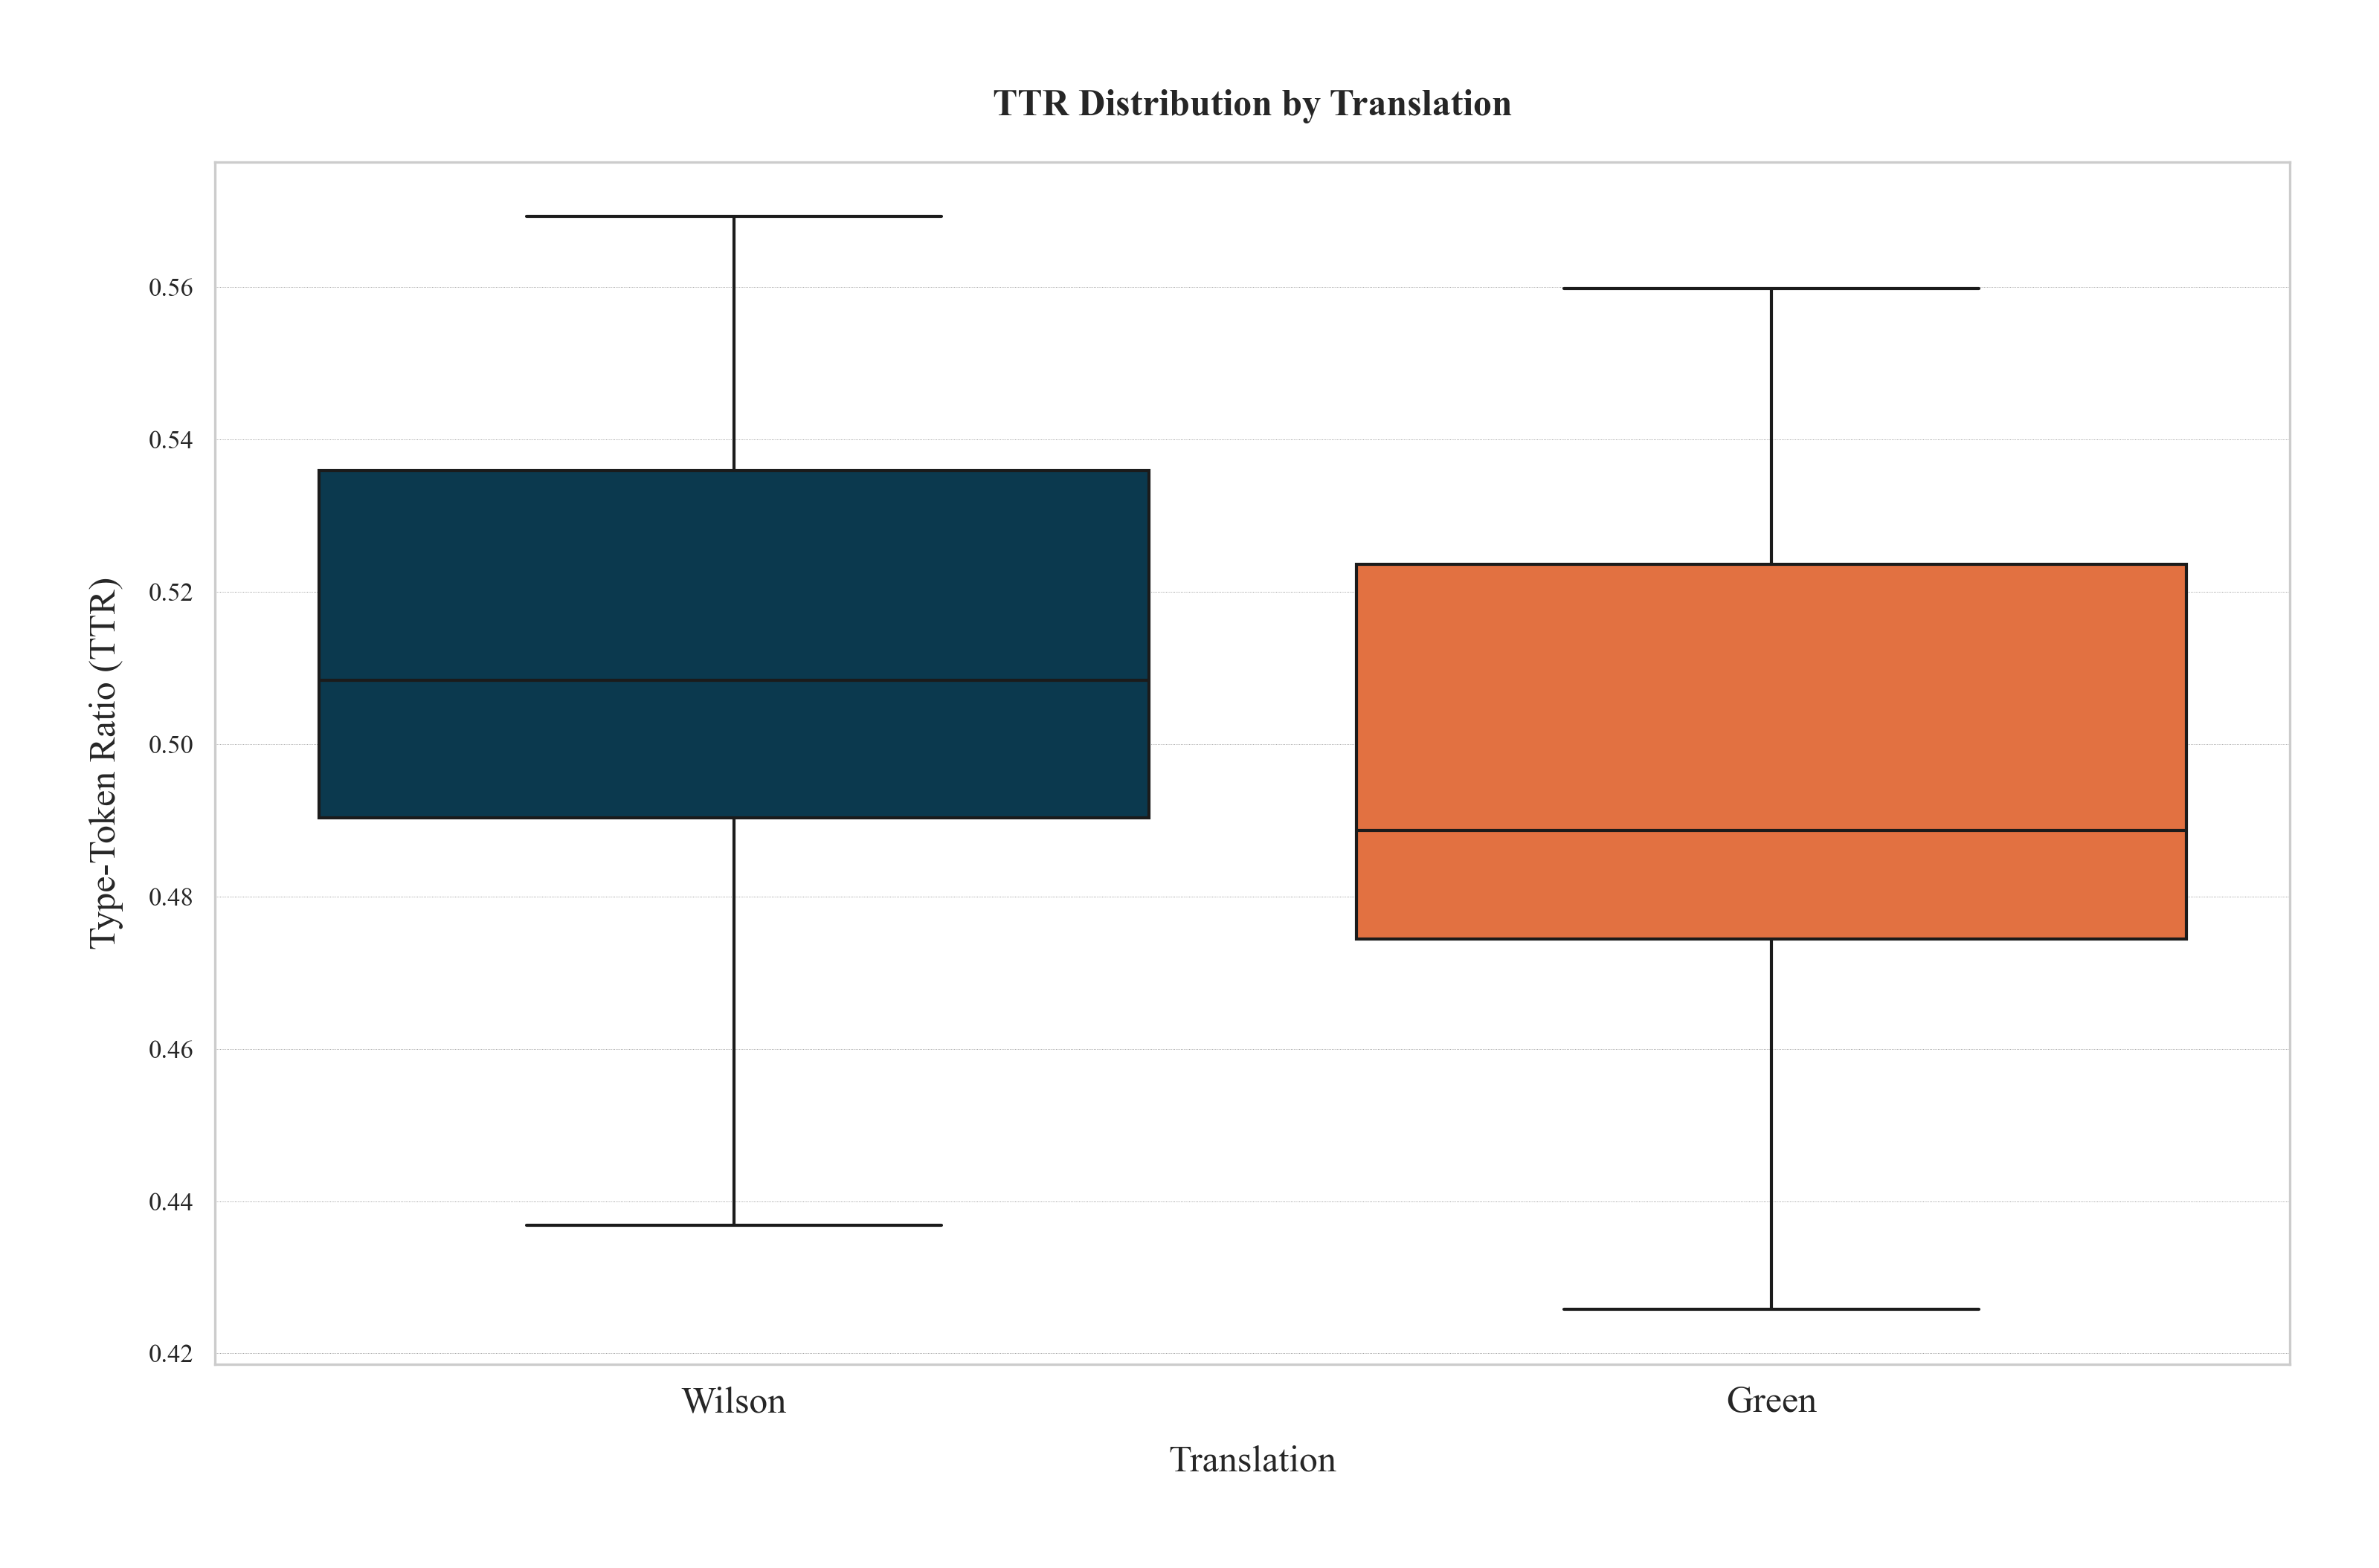

In [5]:
# Create a boxplot for TTR values
sns.boxplot(x=df["translation"], y=df["ttr"], palette=color)
plt.title("TTR Distribution by Translation")
plt.xlabel("Translation")
plt.ylabel("Type-Token Ratio (TTR)")
plt.show()

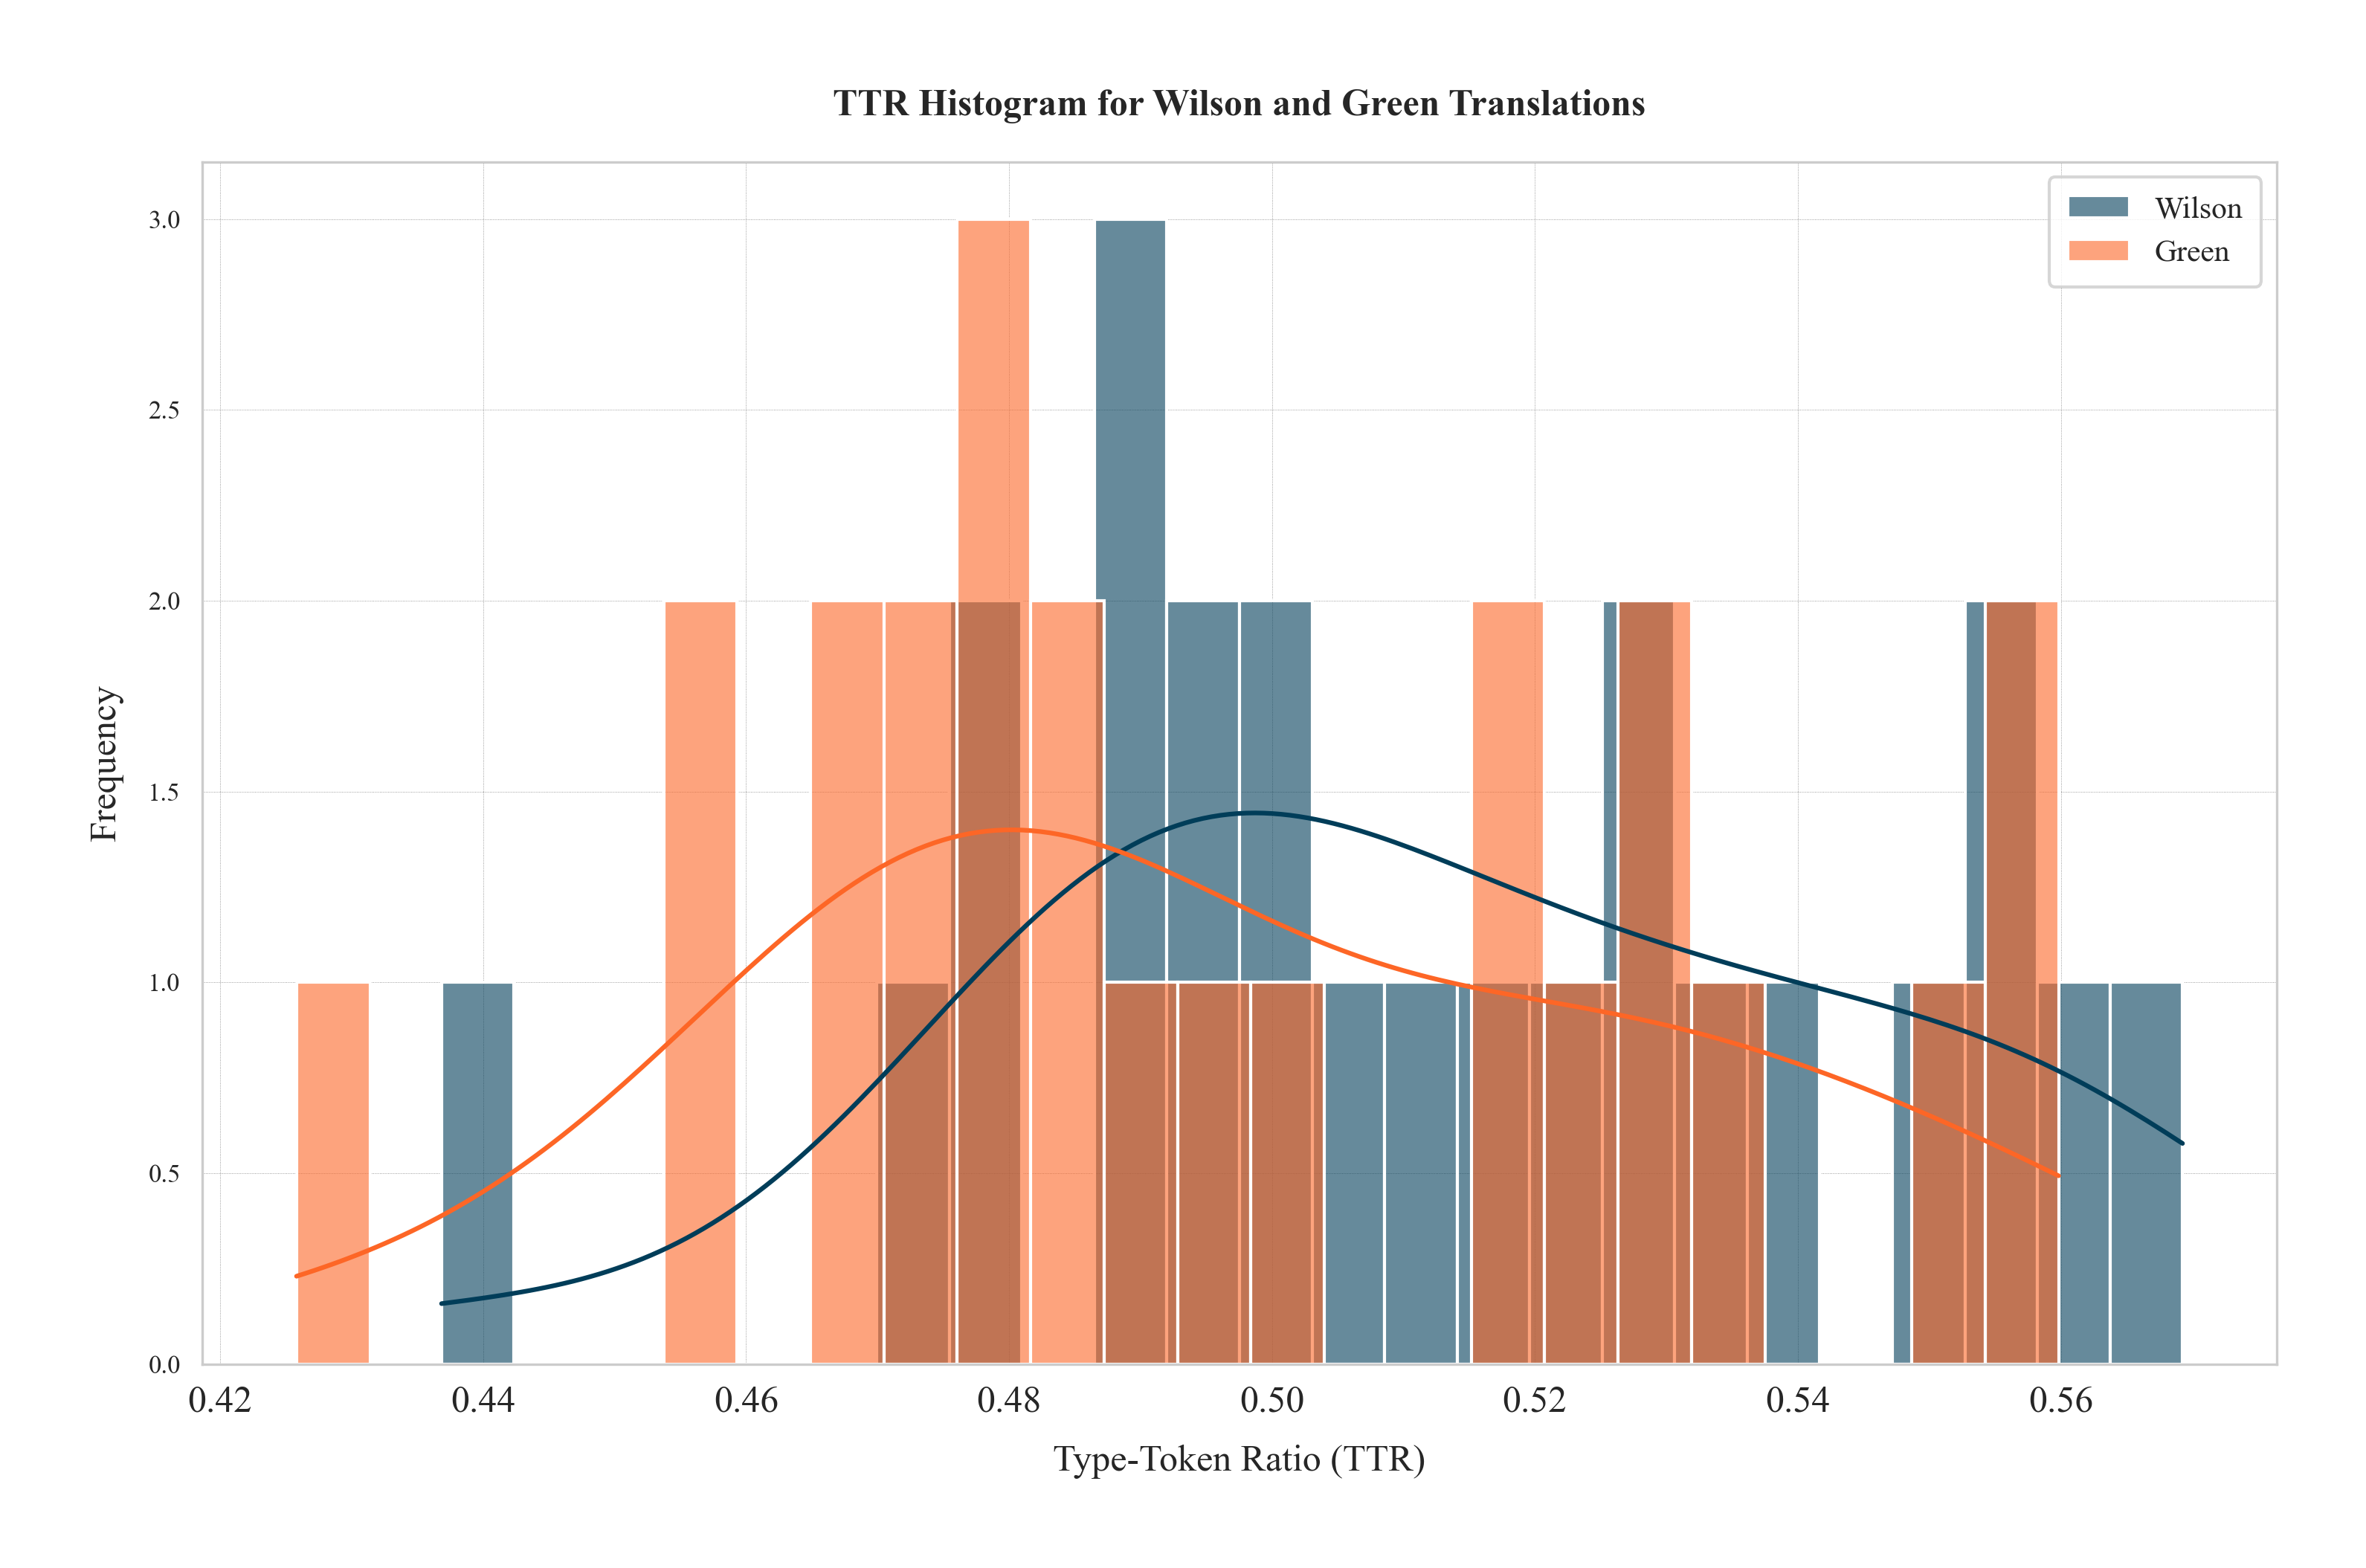

In [6]:
# Create a histogram for TTR values
# Plot histogram for Wilson and Green translations
sns.histplot(ttr_wilson, bins=24, label="Wilson", kde=True, alpha=0.6)
sns.histplot(ttr_green, bins=24, label="Green", kde=True, alpha=0.6)
# Add labels and legend
plt.title("TTR Histogram for Wilson and Green Translations")
plt.xlabel("Type-Token Ratio (TTR)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

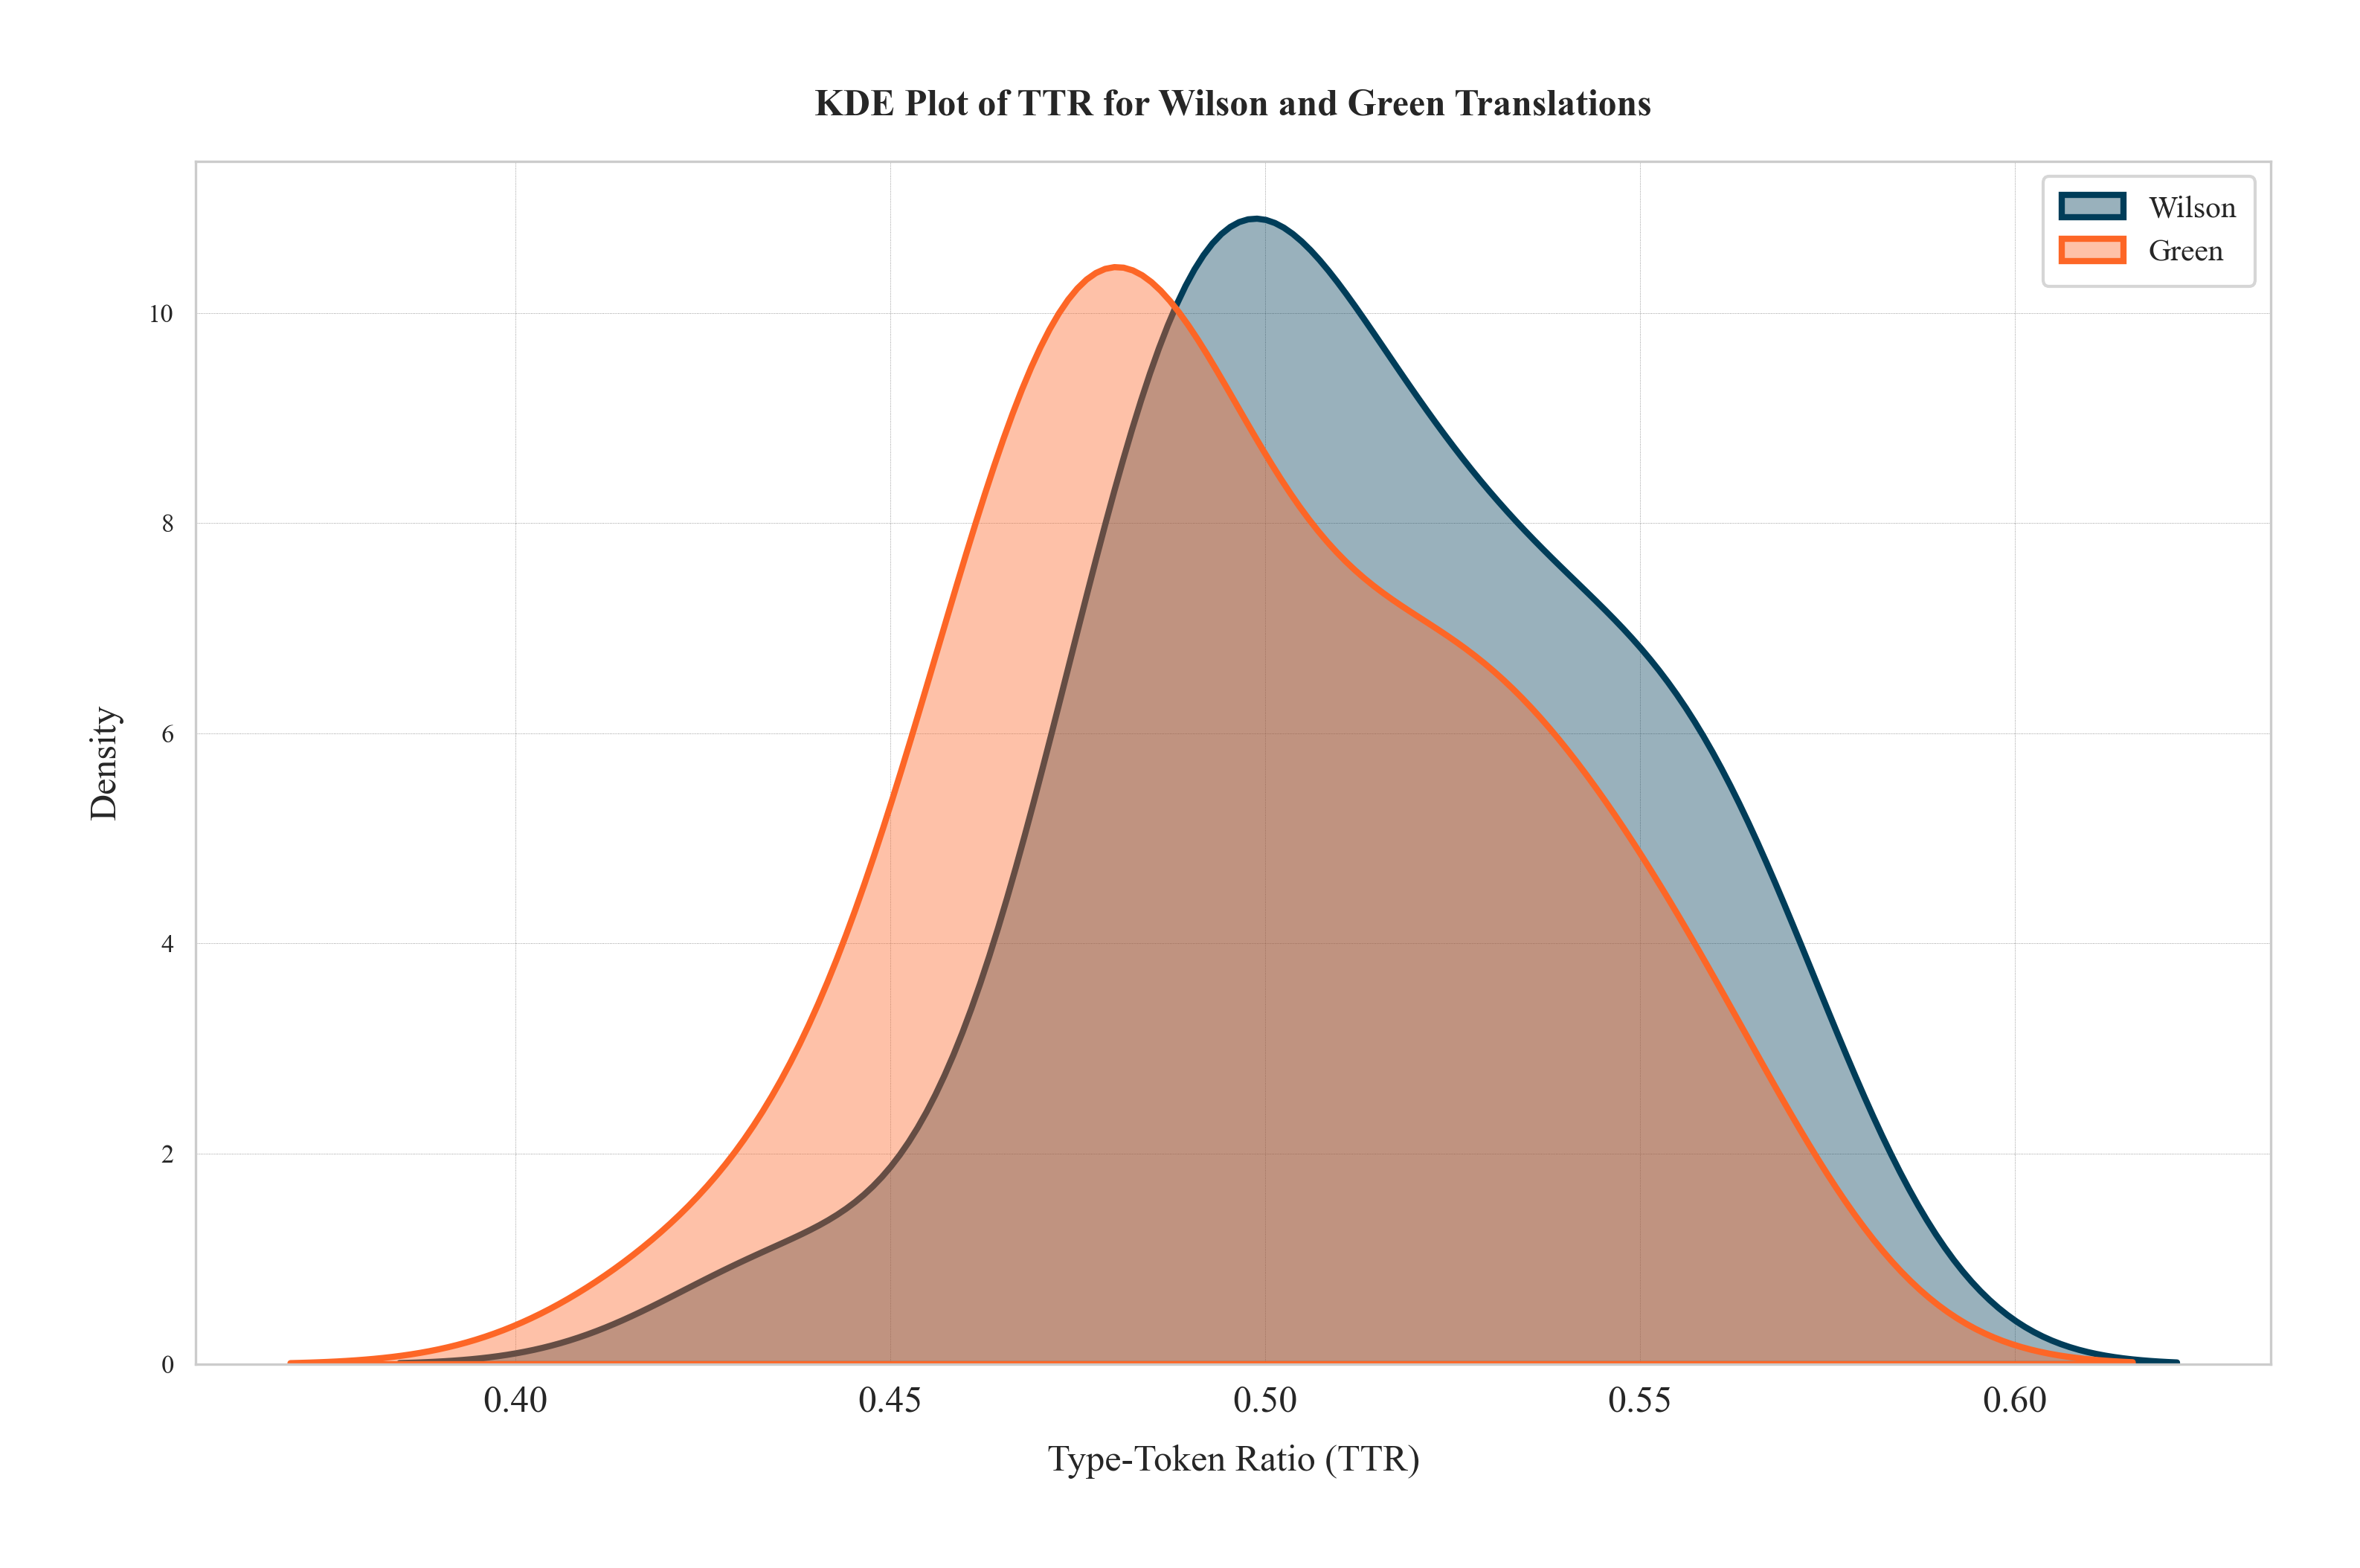

In [7]:
# KDE plot for Wilson and Green translations
sns.kdeplot(ttr_wilson, fill=True, label="Wilson", alpha=0.4, linewidth=2)
sns.kdeplot(ttr_green, fill=True, label="Green", alpha=0.4, linewidth=2)

plt.title("KDE Plot of TTR for Wilson and Green Translations")
plt.xlabel("Type-Token Ratio (TTR)")
plt.ylabel("Density")
plt.legend()
plt.show()

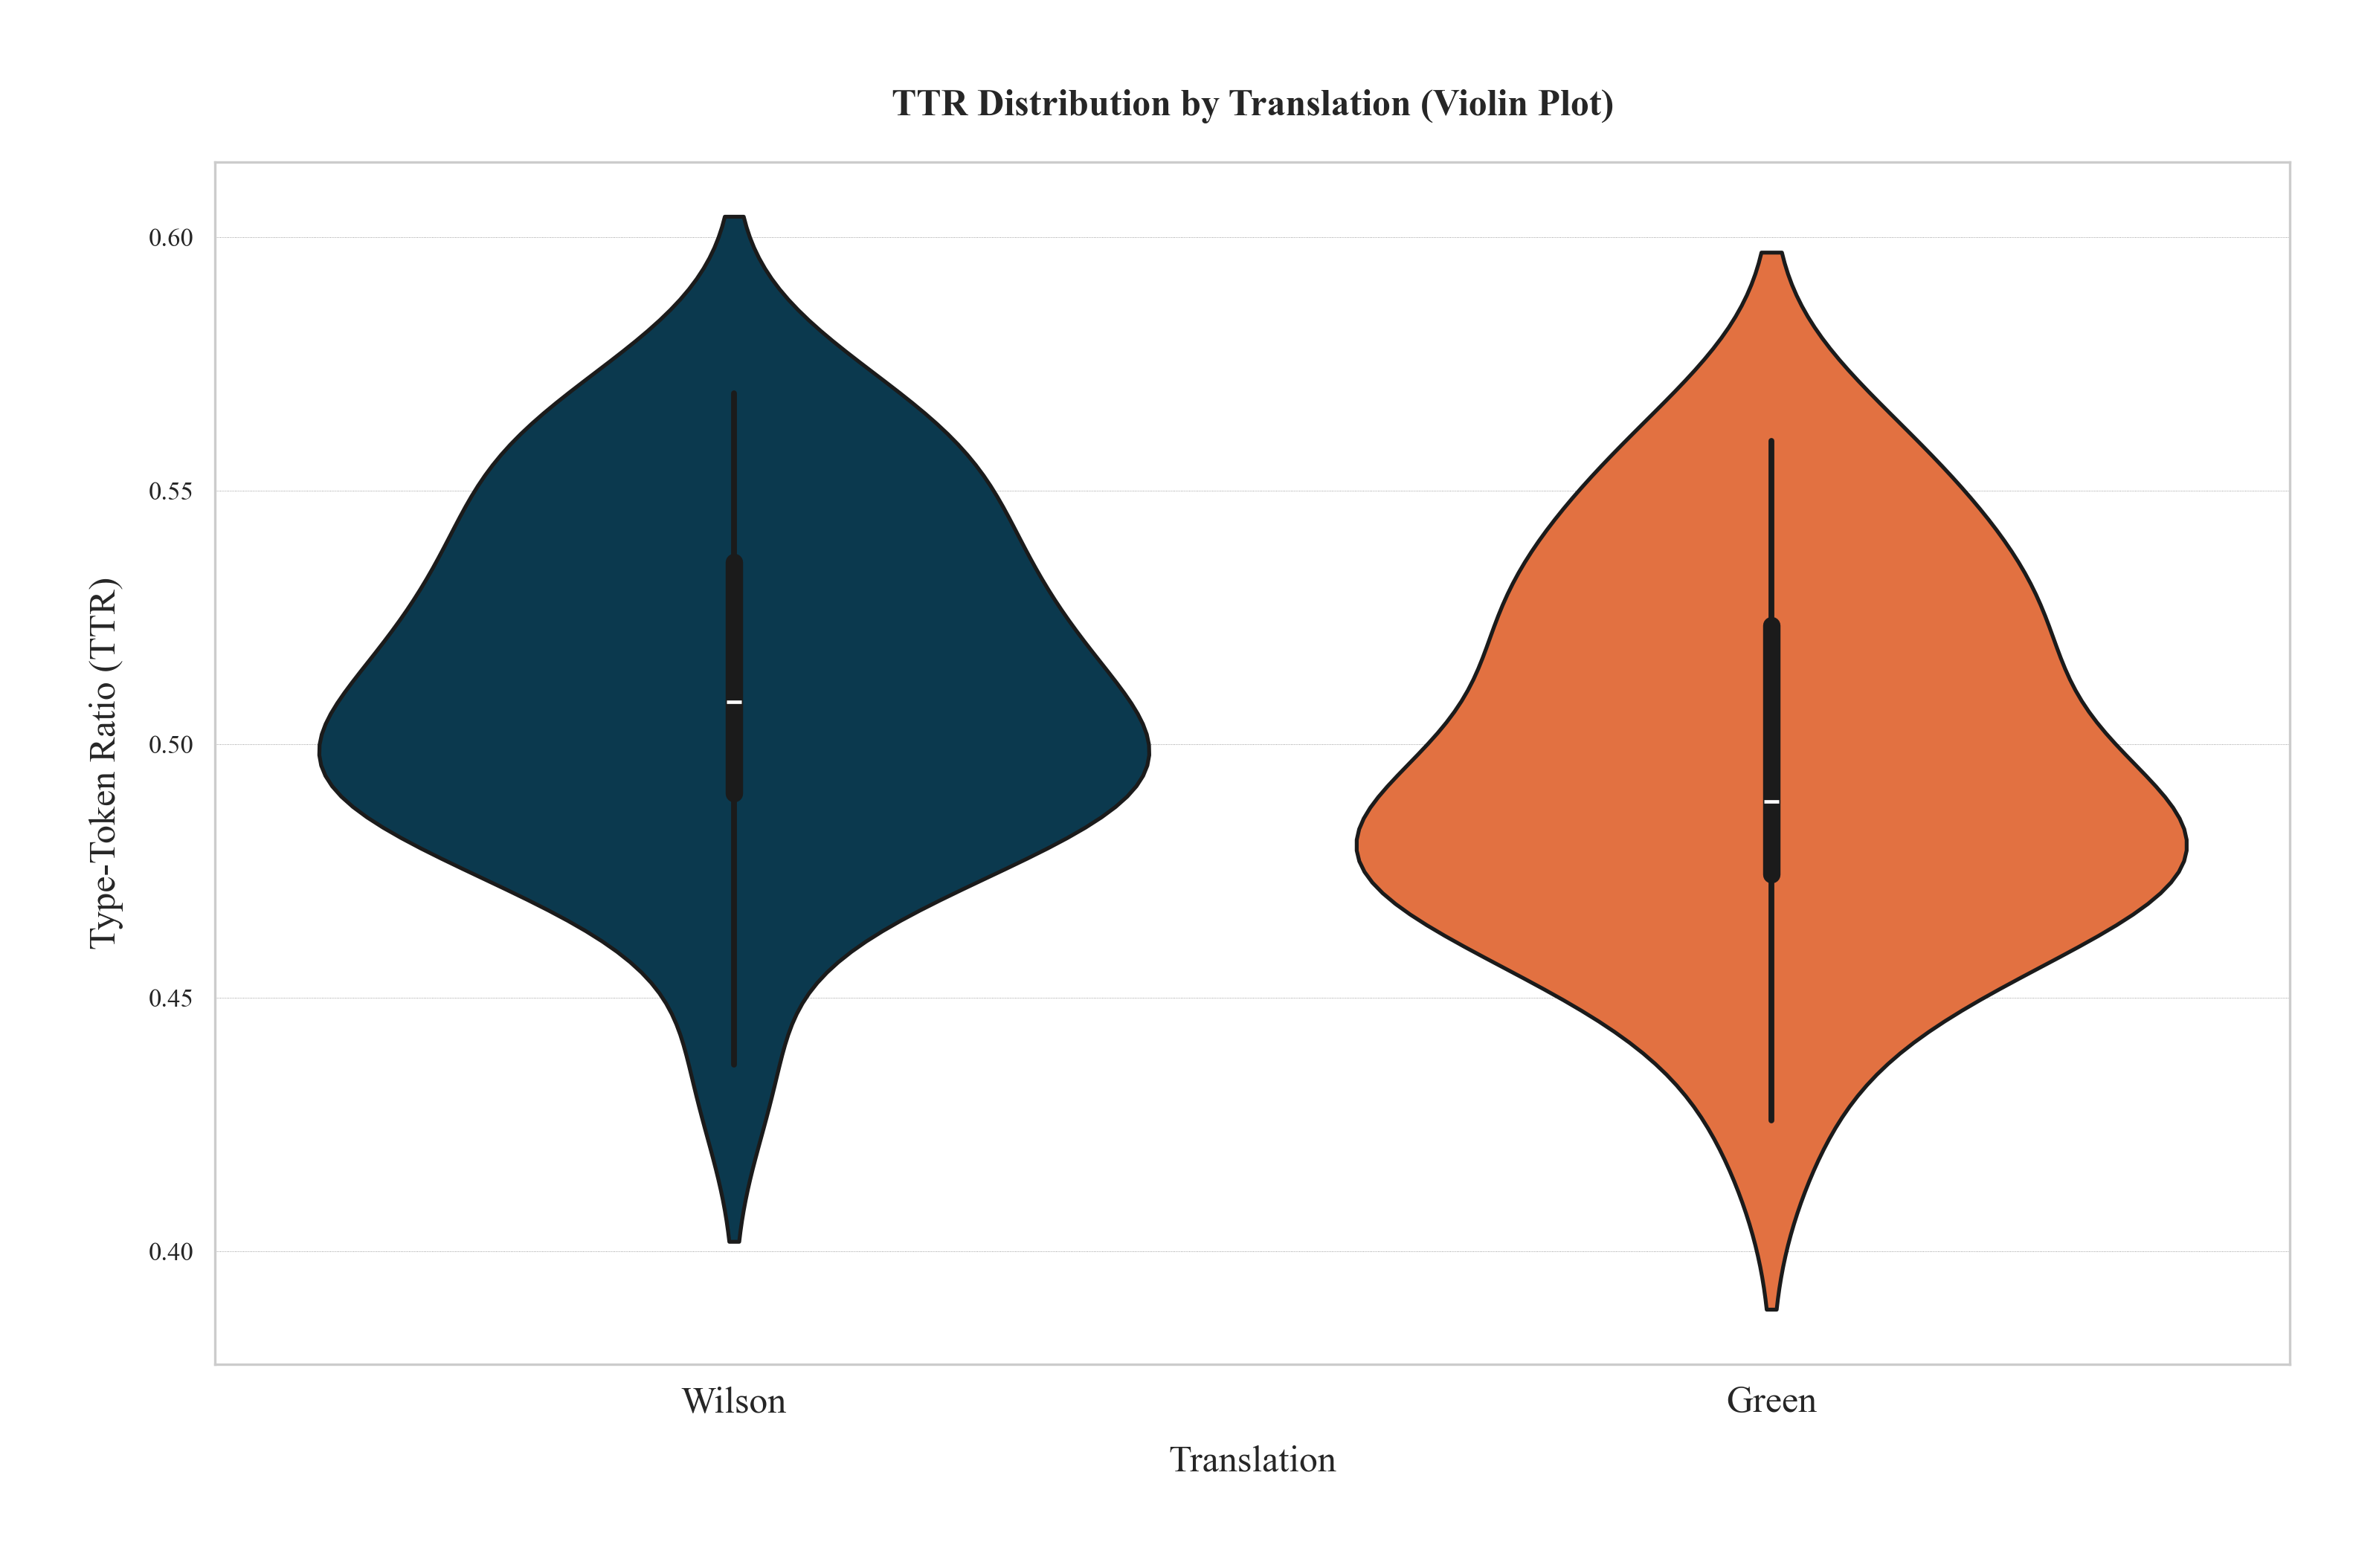

In [8]:
# Create a violin plot for TTR values
sns.violinplot(x=df["translation"], y=df["ttr"], palette=color)
plt.title("TTR Distribution by Translation (Violin Plot)")
plt.xlabel("Translation")
plt.ylabel("Type-Token Ratio (TTR)")
plt.show()

In [9]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(ttr_wilson, ttr_green)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("The difference in TTR between Wilson and Green is statistically significant.")
else:
    print("The difference in TTR between Wilson and Green is not statistically significant.")

T-statistic: 1.609495189629532, P-value: 0.11435036074503503
The difference in TTR between Wilson and Green is not statistically significant.


# Discussion of Type-Token Ratio Analysis Results

## Statistical Findings and Their Implications

The t-test comparing the Type-Token Ratios (TTR) between Wilson's and Green's translations yielded results that did not reach the threshold for statistical significance (p ≥ 0.05). This means we fail to reject the null hypothesis (H₀) that the lexical diversity between Green and Wilson's translations is the same.

## Interpreting Non-Significant Results

While we did not detect a statistically significant difference, this finding itself is meaningful within translation studies. The absence of a significant difference does not represent a failure of the analysis, but rather provides evidence for an important theoretical perspective: translators working within similar cultural-temporal contexts may demonstrate comparable lexical diversity despite individual stylistic preferences.

## Cultural and Contextual Influences

These results support the theory that translators are products of their time and cultural milieu. Both Wilson and Green, as contemporaries, likely:

1. **Shared linguistic resources**: Access to similar lexical resources and translation tools of their era
2. **Operated within common translation norms**: Adherence to prevailing standards and expectations in literary translation
3. **Responded to similar audience expectations**: Accommodation to contemporary readers' preferences and comprehension levels
4. **Were informed by comparable theoretical frameworks**: Influence of translation theories dominant during their working period

## Beyond Statistical Significance

This finding invites us to look beyond mere statistical differences to consider the subtle ways translators negotiate between:

- Fidelity to the source text
- Readability for the target audience
- Literary aesthetics and stylistic considerations
- Cultural and temporal adaptation

The similar TTR values suggest that both translators achieved comparable lexical diversity while potentially making different word choices. This highlights the complexity of translation as both an art and science, where multiple valid approaches can yield texts with similar quantitative measures of diversity.

## Implications for Translation Theory

These results support the view that translators operate within what Bourdieu would call a "field" - a structured social space with its own rules and capital. The comparable TTR values indicate that both translators have internalized similar dispositions (habitus) regarding appropriate lexical diversity in literary translation, despite potentially different translational choices at the sentence or phrase level.

## Future Research Directions

To build upon these findings, future research might:

1. Examine qualitative differences in word choice and register between the translations
2. Analyze other linguistic features such as sentence length, syntactic complexity, or metaphor preservation
3. Compare these translators to others from distinctly different cultural-temporal contexts
4. Investigate reader responses to determine if comparable TTR values correspond to similar reader experiences

## Conclusion

The non-significant difference in TTR between Wilson and Green's translations reveals the subtle ways cultural context shapes translation practice. Far from being a null result, this finding contributes to our understanding of how translators, as cultural mediators, are influenced by their shared temporal and social contexts while exercising individual agency within those constraints.

____________________________________________________
## 3️⃣ Experiment 2: **Zipf’s Law Verification**  
### **Implementation**
* Plot word frequency vs. rank to check adherence to Zipf’s Law.
* Log-log plot comparison for both translations.

In [10]:
# Flatten all tokens into a single list for each translation
tokens_wilson = [token for tokens in df[df["translation"] == "Wilson"]["tokens"] for token in tokens]
tokens_green = [token for tokens in df[df["translation"] == "Green"]["tokens"] for token in tokens]

# Count word frequencies
freq_wilson = Counter(tokens_wilson)
freq_green = Counter(tokens_green)

# Convert to DataFrame with ranks
df_zipf_wilson = pd.DataFrame(freq_wilson.items(), columns=["word", "frequency"]).sort_values(by="frequency", ascending=False)
df_zipf_wilson["rank"] = df_zipf_wilson["frequency"].rank(method="first", ascending=False)

df_zipf_green = pd.DataFrame(freq_green.items(), columns=["word", "frequency"]).sort_values(by="frequency", ascending=False)
df_zipf_green["rank"] = df_zipf_green["frequency"].rank(method="first", ascending=False)

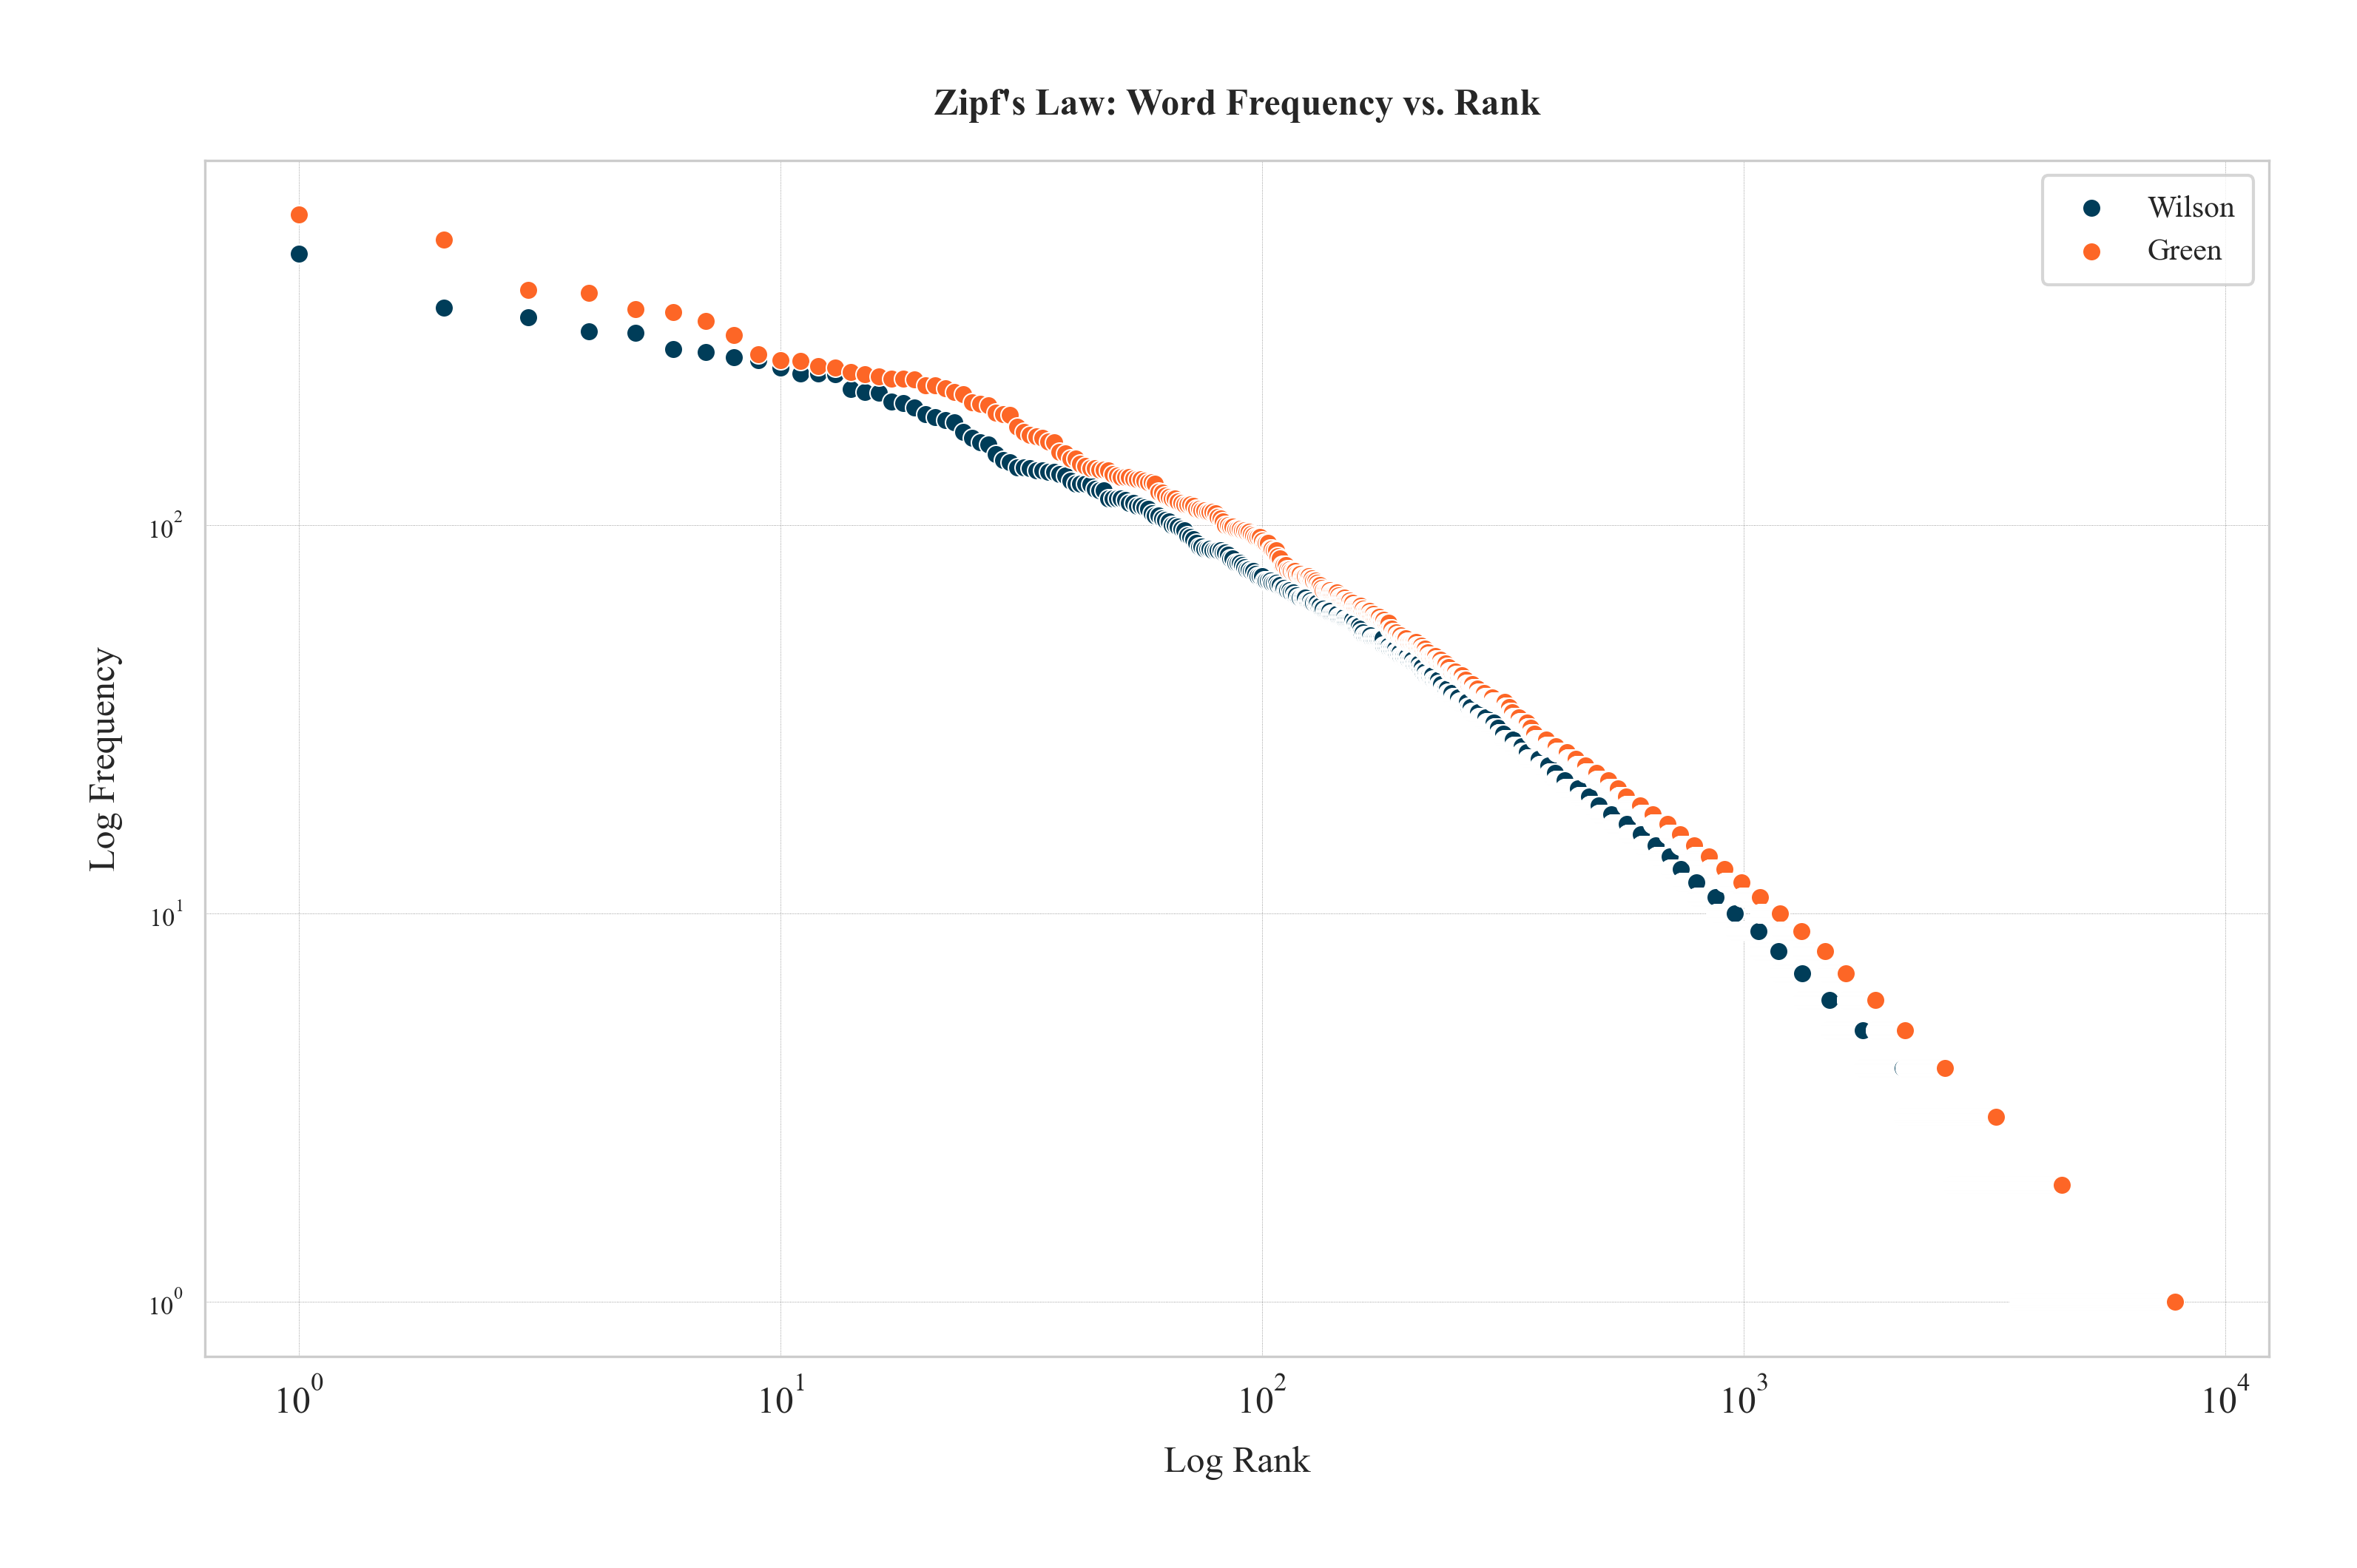

In [11]:
# Plot Wilson and Green's Zipf distribution
sns.scatterplot(x=df_zipf_wilson["rank"], y=df_zipf_wilson["frequency"], label="Wilson")
sns.scatterplot(x=df_zipf_green["rank"], y=df_zipf_green["frequency"], label="Green")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Log Rank")
plt.ylabel("Log Frequency")
plt.title("Zipf's Law: Word Frequency vs. Rank")
plt.legend()
plt.show()

#### **Statistical Test for Zipf’s Law (Linear Fit)**

In [12]:
import numpy as np
from scipy.stats import linregress

# Perform linear regression in log-log space
log_rank_w = np.log(df_zipf_wilson["rank"])
log_freq_w = np.log(df_zipf_wilson["frequency"])
slope_w, intercept_w, r_value_w, p_value_w, std_err_w = linregress(log_rank_w, log_freq_w)

log_rank_g = np.log(df_zipf_green["rank"])
log_freq_g = np.log(df_zipf_green["frequency"])
slope_g, intercept_g, r_value_g, p_value_g, std_err_g = linregress(log_rank_g, log_freq_g)

# Display results
print(f"Wilson: Slope = {slope_w:.2f}, R² = {r_value_w**2:.3f}, p-value = {p_value_w:.3g}")
print(f"Green: Slope = {slope_g:.2f}, R² = {r_value_g**2:.3f}, p-value = {p_value_g:.3g}")

# Check if slopes are close to -1 (Zipf's Law predicts ~ -1)
if -1.2 < slope_w < -0.8:
    print("Wilson's translation follows Zipf's Law.")
else:
    print("Wilson's translation deviates from Zipf's Law.")

if -1.2 < slope_g < -0.8:
    print("Green's translation follows Zipf's Law.")
else:
    print("Green's translation deviates from Zipf's Law.")

Wilson: Slope = -1.14, R² = 0.960, p-value = 0
Green: Slope = -1.14, R² = 0.960, p-value = 0
Wilson's translation follows Zipf's Law.
Green's translation follows Zipf's Law.


#### **Statistical Test for Differences in Zipf Slopes**

In [13]:
from scipy.stats import ttest_ind

# Compute t-test for the difference in slopes
t_stat, p_value = ttest_ind([slope_w], [slope_g])

# Print results
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("The difference in Zipf's Law slopes between Wilson and Green is statistically significant.")
else:
    print("No significant difference in Zipf's Law slopes between Wilson and Green.")

T-statistic: nan, P-value: nan
No significant difference in Zipf's Law slopes between Wilson and Green.


#### Bootstrapped Confidence Intervals

In [14]:
# Function to bootstrap slope estimates
def bootstrap_slopes(log_rank, log_freq, num_samples=1000):
    slopes = []
    for _ in range(num_samples):
        sample_indices = np.random.choice(len(log_rank), len(log_rank), replace=True)
        slope, _, _, _, _ = linregress(log_rank[sample_indices], log_freq[sample_indices])
        slopes.append(slope)
    return np.array(slopes)

# Bootstrap slopes for both translations
bootstrap_slopes_w = bootstrap_slopes(log_rank_w, log_freq_w)
bootstrap_slopes_g = bootstrap_slopes(log_rank_g, log_freq_g)

# Compute 95% confidence intervals
ci_w = np.percentile(bootstrap_slopes_w, [2.5, 97.5])
ci_g = np.percentile(bootstrap_slopes_g, [2.5, 97.5])

print(f"Wilson's slope 95% CI: {ci_w}")
print(f"Green's slope 95% CI: {ci_g}")

# Check if CIs overlap
if (ci_w[0] > ci_g[1]) or (ci_g[0] > ci_w[1]):
    print("Statistically significant difference between the two Zipf slopes.")
else:
    print("No significant difference between the two Zipf slopes.")

Wilson's slope 95% CI: [-1.15474594 -1.11922798]
Green's slope 95% CI: [-1.15733327 -1.12355867]
No significant difference between the two Zipf slopes.


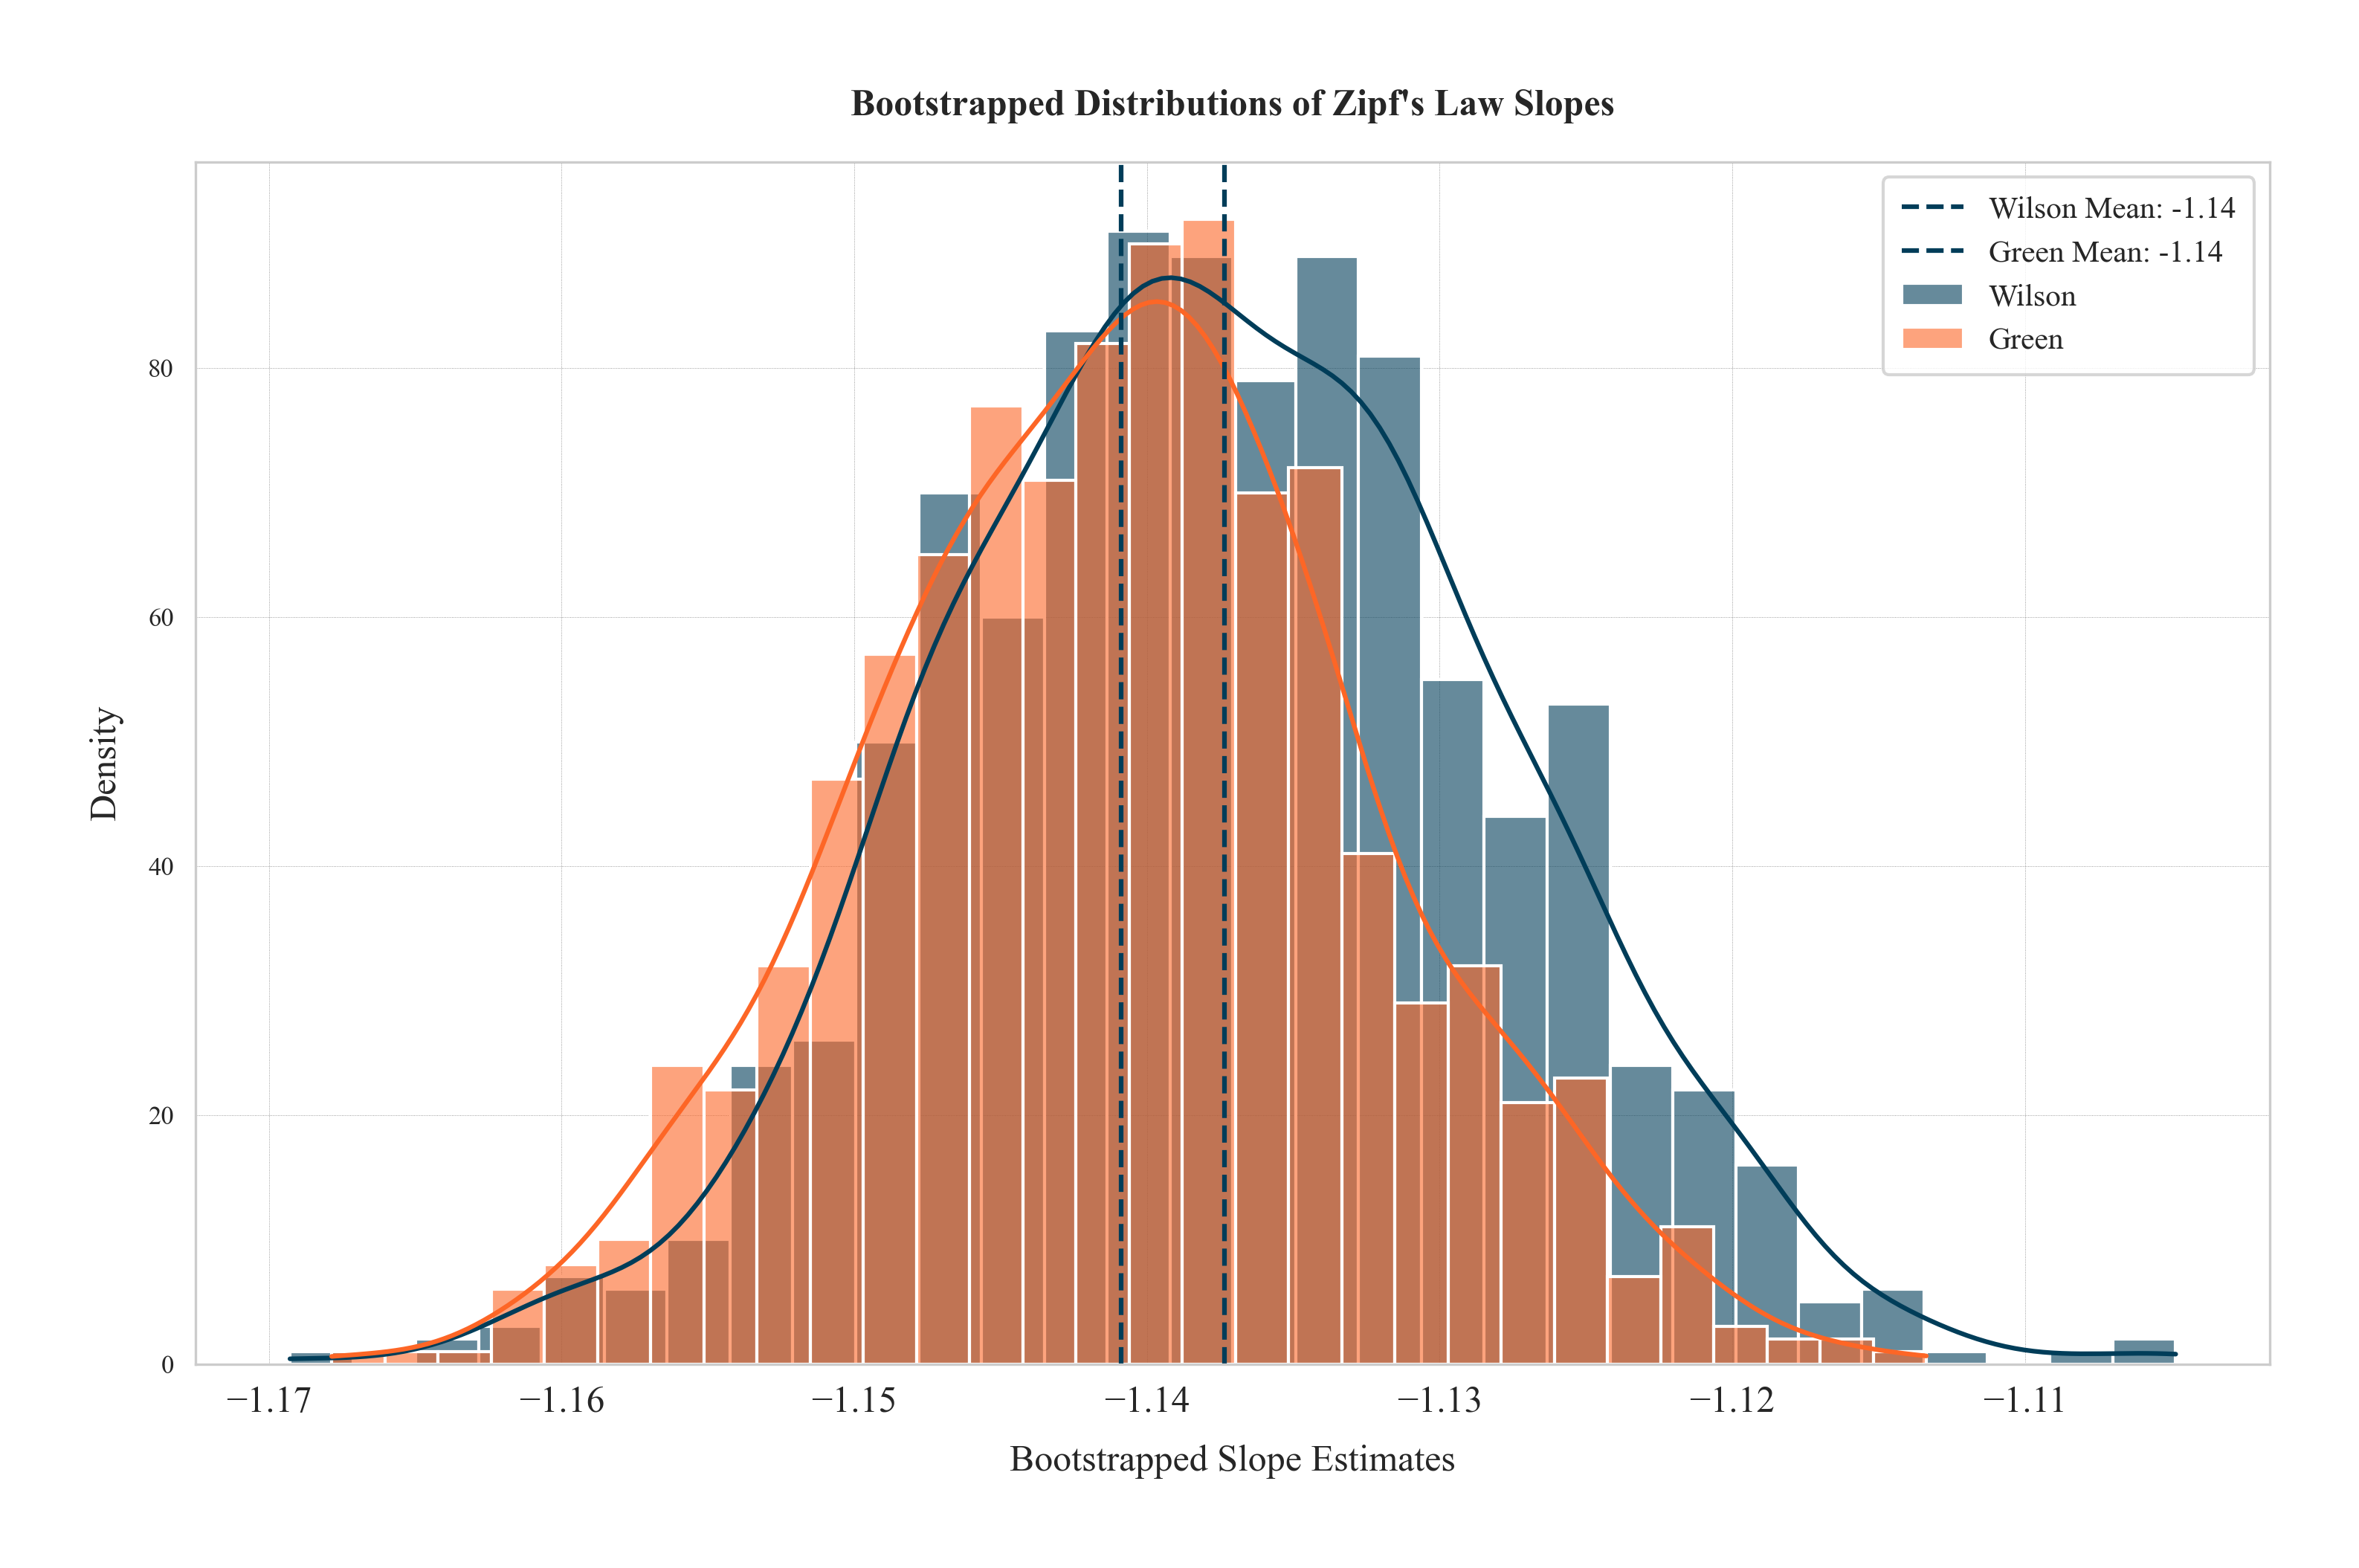

In [15]:
# Plot histograms for bootstrapped slopes
sns.histplot(bootstrap_slopes_w, bins=30, kde=True, label="Wilson", alpha=0.6)
sns.histplot(bootstrap_slopes_g, bins=30, kde=True, label="Green", alpha=0.6)

# Add vertical lines for mean slopes
plt.axvline(np.mean(bootstrap_slopes_w), linestyle="dashed", label=f"Wilson Mean: {np.mean(bootstrap_slopes_w):.2f}")
plt.axvline(np.mean(bootstrap_slopes_g), linestyle="dashed", label=f"Green Mean: {np.mean(bootstrap_slopes_g):.2f}")

# Labels and title
plt.xlabel("Bootstrapped Slope Estimates")
plt.ylabel("Density")
plt.title("Bootstrapped Distributions of Zipf's Law Slopes")
plt.legend()
plt.show()

____________________________________________________
## 4️⃣ Experiment 3: **TF-IDF Analysis**  

### **Term Frequency (TF) Calculation** 

Term Frequency measures how frequently a term appears in a document. It is calculated as:

$$TF(t,d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}$$

This normalizes term counts by document length, ensuring that longer documents don't get artificially higher weights.

In [31]:
df_W

book_num  \
0          1   
1          2   
2          3   
3          4   
4          5   
5          6   
6          7   
7          8   
8          9   
9         10   
10        11   
11        12   
12        13   
13        14   
14        15   
15        16   
16        17   
17        18   
18        19   
19        20   
20        21   
21        22   
22        23   
23        24   

                                                                                                                                                   tokens  \
0   ['tell', 'complicated', 'man', 'muse', 'tell', 'wandered', 'lost', 'wrecked', 'holy', 'town', 'troy', 'went', 'met', 'pain', 'suﬀered', 'storms', ...   
1   ['dangerous', 'journey', 'early', 'dawn', 'born', 'fingers', 'bloomed', 'odysseus', 'well-beloved', 'son', 'jumped', 'put', 'clothes', 'strapped',...   
2   ['old', 'king', 'remembers', 'leaving', 'ocean', 'streams', 'sun', 'leapt', 'sky', 'bronze', 'shine', 'light', 'gods', 'mortals', 'fertile', 'eart...   
3   ['sea', 'god', 'said', 'came', 'sparta', 'land', 'caves', 'valleys', 'drove', 'menelaus', 'house', 'found', 'hosting', 'wedding', 'feast', 'many',...   
4   ['goddess', 'storm', 'dawn', 'rose', 'bed', 'lord', 'tithonus', 'bring', 'light', 'deathless', 'gods', 'mortals', 'gods', 'sat', 'council', 'great...   
5   ['princess', 'laundry', 'odysseus', 'suﬀered', 'exhaustion', 'long', 'ordeals', 'hero', 'slept', 'meanwhile', 'athena', 'went', 'phaeacians', 'peo...   
6   ['magical', 'kingdom', 'odysseus', 'sat', 'patiently', 'prayed', 'meanwhile', 'fine', 'strong', 'mules', 'conveyed', 'girl', 'town', 'reached', 'f...   
7   ['songs', 'poet', 'soon', 'dawn', 'appeared', 'touched', 'sky', 'roses', 'majestic', 'holy', 'king', 'alcinous', 'leapt', 'bed', 'odysseus', 'city...   
8   ['pirate', 'shepherd', 'cave', 'wily', 'odysseus', 'lord', 'lies', 'answered', 'lord', 'alcinous', 'great', 'king', 'splendid', 'thing', 'hear', '...   
9   ['winds', 'witch', 'reached', 'floating', 'island', 'aeolus', 'well', 'loved', 'deathless', 'gods', 'around', 'sheer', 'cliﬀs', 'runs', 'wall', 's...   
10  ['dead', 'reached', 'sea', 'first', 'launched', 'ship', 'sparkling', 'salty', 'water', 'set', 'mast', 'sails', 'brought', 'sheep', 'board', 'us', ...   
11  ['diﬃcult', 'choices', 'ship', 'sailed', 'beyond', 'stream', 'ocean', 'across', 'waves', 'open', 'sea', 'came', 'aeaea', 'home', 'newborn', 'dawn'...   
12  ['tricksters', 'finished', 'silent', 'spellbound', 'sitting', 'inside', 'shadowy', 'hall', 'last', 'alcinous', 'said', 'odysseus', 'since', 'guest...   
13  ['loyal', 'slave', 'leaving', 'bay', 'hiked', 'rugged', 'path', 'woodland', 'across', 'cliﬀs', 'athena', 'shown', 'go', 'find', 'swineherd', 'odys...   
14  ['prince', 'returns', 'athena', 'went', 'sparta', 'ensure', 'safe', 'return', 'prince', 'telemachus', 'found', 'pisistratus', 'lying', 'menelaus',...   
15  ['father', 'son', 'dawn', 'swineherd', 'odysseus', 'made', 'breakfast', 'lit', 'fire', 'sent', 'herdsmen', 'pigs', 'rounded', 'dogs', 'rule', 'wou...   
16  ['insults', 'abuse', 'newborn', 'dawn', 'appeared', 'hands', 'flowers', 'telemachus', 'odysseus', 'son', 'fastened', 'handsome', 'sandals', 'feet'...   
17  ['beggars', 'came', 'man', 'begged', 'throughout', 'town', 'ithaca', 'notorious', 'greed', 'ate', 'drank', 'nonstop', 'fat', 'weak', 'capacity', '...   
18  ['queen', 'beggar', 'odysseus', 'left', 'hall', 'athena', 'hatching', 'plans', 'kill', 'suitors', 'words', 'flew', 'fast', 'telemachus', 'get', 'w...   
19  ['last', 'banquet', 'odysseus', 'lying', 'entrance', 'untreated', 'oxhide', 'heaped', 'pile', 'fleeces', 'sheep', 'suitors', 'sacrificed', 'euryno...   
20  ['archery', 'contest', 'glinting', 'eyes', 'athena', 'put', 'thought', 'mind', 'wise', 'penelope', 'daughter', 'icarius', 'place', 'bow', 'iron', ...   
21  ['bloodshed', 'odysseus', 'ripped', 'oﬀ', 'rags', 'naked', 'leapt', 'upon', 'threshold', 'bow', 'quiverfull', 'arrows', 'tipped', 'rush', 'feet',

In [32]:
from collections import Counter

# Function to count term frequency correctly
def term_freq_by_doc(list_of_tokens):
    return Counter(list_of_tokens)  # Directly count tokens (not characters!)

# Apply function to count term frequency for each book
df_W["term_freq"] = df_W["tokens"].apply(term_freq_by_doc)

# Display results
df_W[["book_num", "term_freq"]]


book_num  \
0          1   
1          2   
2          3   
3          4   
4          5   
5          6   
6          7   
7          8   
8          9   
9         10   
10        11   
11        12   
12        13   
13        14   
14        15   
15        16   
16        17   
17        18   
18        19   
19        20   
20        21   
21        22   
22        23   
23        24   

                                                                                                                                                term_freq  
0   {'[': 1, ''': 3460, 't': 618, 'e': 1249, 'l': 503, ',': 1729, ' ': 1729, 'c': 244, 'o': 678, 'm': 259, 'p': 215, 'i': 559, 'a': 694, 'd': 474, 'n'...  
1   {'[': 1, ''': 3366, 'd': 497, 'a': 657, 'n': 569, 'g': 289, 'e': 1232, 'r': 586, 'o': 666, 'u': 332, 's': 795, ',': 1682, ' ': 1682, 'j': 20, 'y':...  
2   {'[': 1, ''': 4062, 'o': 754, 'l': 575, 'd': 607, ',': 2030, ' ': 2030, 'k': 149, 'i': 635, 'n': 671, 'g': 382, 'r': 802, 'e': 1552, 'm': 290, 'b'...  
3   {'[': 1, ''': 6776, 's': 1639, 'e': 2501, 'a': 1432, ',': 3387, ' ': 3387, 'g': 588, 'o': 1202, 'd': 1038, 'i': 997, 'c': 429, 'm': 468, 'p': 496,...  
4   {'[': 1, ''': 4064, 'g': 374, 'o': 663, 'd': 702, 'e': 1468, 's': 1036, ',': 2031, ' ': 2031, 't': 654, 'r': 719, 'm': 220, 'a': 851, 'w': 264, 'n...  
5   {'[': 1, ''': 2620, 'p': 183, 'r': 492, 'i': 436, 'n': 416, 'c': 209, 'e': 925, 's': 614, ',': 1309, ' ': 1309, 'l': 387, 'a': 598, 'u': 234, 'd':...  
6   {'[': 1, ''': 2776, 'm': 190, 'a': 603, 'g': 269, 'i': 457, 'c': 202, 'l': 449, ',': 1387, ' ': 1387, 'k': 109, 'n': 451, 'd': 411, 'o': 513, 'y':...  
7   {'[': 1, ''': 4582, 's': 1180, 'o': 911, 'n': 731, 'g': 443, ',': 2290, ' ': 2290, 'p': 371, 'e': 1672, 't': 759, 'd': 719, 'a': 941, 'w': 238, 'r...  
8   {'[': 1, ''': 4748, 'p': 308, 'i': 762, 'r': 817, 'a': 927, 't': 730, 'e': 1595, ',': 2373, ' ': 2373, 's': 1058, 'h': 443, 'd': 742, 'c': 405, 'v...  
9   {'[': 1, ''': 4678, 'w': 273, 'i': 775, 'n': 781, 'd': 783, 's': 1009, ',': 2338, ' ': 2338, 't': 730, 'c': 378, 'h': 480, 'r': 810, 'e': 1626, 'a...  
10  {'[': 1, ''': 5096, 'd': 763, 'e': 1855, 'a': 1005, ',': 2547, ' ': 2547, 'r': 937, 'c': 364, 'h': 541, 's': 1202, 'f': 210, 'i': 829, 't': 836, '...  
11  {'[': 1, ''': 3760, 'd': 602, 'i': 624, 'ﬃ': 2, 'c': 331, 'u': 300, 'l': 519, 't': 604, ',': 1879, ' ': 1879, 'h': 385, 'o': 570, 'e': 1326, 's': ...  
12  {'[': 1, ''': 3458, 't': 553, 'r': 606, 'i': 608, 'c': 269, 'k': 158, 's': 835, 'e': 1247, ',': 1728, ' ': 1728, 'f': 133, 'n': 604, 'h': 373, 'd'...  
13  {'[': 1, ''': 4276, 'l': 575, 'o': 744, 'y': 216, 'a': 827, ',': 2137, ' ': 2137, 's': 1048, 'v': 108, 'e': 1544, 'i': 727, 'n': 661, 'g': 416, 'b...  
14  {'[': 1, ''': 4304, 'p': 281, 'r': 747, 'i': 703, 'n': 711, 'c': 314, 'e': 1590, ',': 2151, ' ': 2151, 't': 731, 'u': 379, 's': 1019, 'a': 886, 'h...  
15  {'[': 1, ''': 3576, 'f': 135, 'a': 701, 't': 657, 'h': 372, 'e': 1247, 'r': 582, ',': 1787, ' ': 1787, 's': 892, 'o': 661, 'n': 616, 'd': 519, 'w'...  
16  {'[': 1, ''': 4712, 'i': 680, 'n': 799, 's': 1250, 'u': 510, 'l': 697, 't': 812, ',': 2355, ' ': 2355, 'a': 1007, 'b': 176, 'e': 1708, 'w': 263, '...  
17  {'[': 1, ''': 3374, 'b': 168, 'e': 1158, 'g': 386, 'a': 651, 'r': 592, 's': 805, ',': 1686, ' ': 1686, 'c': 249, 'm': 250, 'n': 537, 'd': 503, 't'...  
18  {'[': 1, ''': 4658, 'q': 19, 'u': 474, 'e': 1702, 'n': 780, ',': 2328, ' ': 2328, 'b': 191, 'g': 414, 'a': 929, 'r': 815, 'o': 896, 'd': 689, 'y':...  
19  {'[': 1, ''': 3018, 'l': 461, 'a': 637, 's': 767, 't': 554, ',': 1508, ' ': 1508, 'b': 130, 'n': 481, 'q': 14, 'u': 347, 'e': 1095, 'o': 551, 'd':...  
20  {'[': 1, ''': 3334, 'a': 649, 'r': 602, 'c': 248, 'h': 317, 'e': 1151, 'y': 178, ',': 1666, ' ': 1666, 'o': 660, 'n': 518, 't': 595, 's': 808, 'g'...  
21  {'[': 1, ''': 3920, 'b': 136, 'l': 622, 'o': 802, 'd': 667, 's': 1035, 'h': 438, 'e': 1387, ',': 1959, ' ': 1959, 'y': 192, 'u': 414, 'r': 765, 'i...  
22  {'[': 1, ''

In [18]:
freq_df

doc_id  \
0        1   
1        2   
2        3   
3        4   
4        5   
5        6   
6        7   
7        8   
8        9   
9       10   
10      11   
11      12   
12      13   
13      14   
14      15   
15      16   
16      17   
17      18   
18      19   
19      20   
20      21   
21      22   
22      23   
23      24   

                                                                                                                                                     term  \
0   ['tell', 'complicated', 'man', 'muse', 'tell', 'wandered', 'lost', 'wrecked', 'holy', 'town', 'troy', 'went', 'met', 'pain', 'suﬀered', 'storms', ...   
1   ['dangerous', 'journey', 'early', 'dawn', 'born', 'fingers', 'bloomed', 'odysseus', 'well-beloved', 'son', 'jumped', 'put', 'clothes', 'strapped',...   
2   ['old', 'king', 'remembers', 'leaving', 'ocean', 'streams', 'sun', 'leapt', 'sky', 'bronze', 'shine', 'light', 'gods', 'mortals', 'fertile', 'eart...   
3   ['sea', 'god', 'said', 'came', 'sparta', 'land', 'caves', 'valleys', 'drove', 'menelaus', 'house', 'found', 'hosting', 'wedding', 'feast', 'many',...   
4   ['goddess', 'storm', 'dawn', 'rose', 'bed', 'lord', 'tithonus', 'bring', 'light', 'deathless', 'gods', 'mortals', 'gods', 'sat', 'council', 'great...   
5   ['princess', 'laundry', 'odysseus', 'suﬀered', 'exhaustion', 'long', 'ordeals', 'hero', 'slept', 'meanwhile', 'athena', 'went', 'phaeacians', 'peo...   
6   ['magical', 'kingdom', 'odysseus', 'sat', 'patiently', 'prayed', 'meanwhile', 'fine', 'strong', 'mules', 'conveyed', 'girl', 'town', 'reached', 'f...   
7   ['songs', 'poet', 'soon', 'dawn', 'appeared', 'touched', 'sky', 'roses', 'majestic', 'holy', 'king', 'alcinous', 'leapt', 'bed', 'odysseus', 'city...   
8   ['pirate', 'shepherd', 'cave', 'wily', 'odysseus', 'lord', 'lies', 'answered', 'lord', 'alcinous', 'great', 'king', 'splendid', 'thing', 'hear', '...   
9   ['winds', 'witch', 'reached', 'floating', 'island', 'aeolus', 'well', 'loved', 'deathless', 'gods', 'around', 'sheer', 'cliﬀs', 'runs', 'wall', 's...   
10  ['dead', 'reached', 'sea', 'first', 'launched', 'ship', 'sparkling', 'salty', 'water', 'set', 'mast', 'sails', 'brought', 'sheep', 'board', 'us', ...   
11  ['diﬃcult', 'choices', 'ship', 'sailed', 'beyond', 'stream', 'ocean', 'across', 'waves', 'open', 'sea', 'came', 'aeaea', 'home', 'newborn', 'dawn'...   
12  ['tricksters', 'finished', 'silent', 'spellbound', 'sitting', 'inside', 'shadowy', 'hall', 'last', 'alcinous', 'said', 'odysseus', 'since', 'guest...   
13  ['loyal', 'slave', 'leaving', 'bay', 'hiked', 'rugged', 'path', 'woodland', 'across', 'cliﬀs', 'athena', 'shown', 'go', 'find', 'swineherd', 'odys...   
14  ['prince', 'returns', 'athena', 'went', 'sparta', 'ensure', 'safe', 'return', 'prince', 'telemachus', 'found', 'pisistratus', 'lying', 'menelaus',...   
15  ['father', 'son', 'dawn', 'swineherd', 'odysseus', 'made', 'breakfast', 'lit', 'fire', 'sent', 'herdsmen', 'pigs', 'rounded', 'dogs', 'rule', 'wou...   
16  ['insults', 'abuse', 'newborn', 'dawn', 'appeared', 'hands', 'flowers', 'telemachus', 'odysseus', 'son', 'fastened', 'handsome', 'sandals', 'feet'...   
17  ['beggars', 'came', 'man', 'begged', 'throughout', 'town', 'ithaca', 'notorious', 'greed', 'ate', 'drank', 'nonstop', 'fat', 'weak', 'capacity', '...   
18  ['queen', 'beggar', 'odysseus', 'left', 'hall', 'athena', 'hatching', 'plans', 'kill', 'suitors', 'words', 'flew', 'fast', 'telemachus', 'get', 'w...   
19  ['last', 'banquet', 'odysseus', 'lying', 'entrance', 'untreated', 'oxhide', 'heaped', 'pile', 'fleeces', 'sheep', 'suitors', 'sacrificed', 'euryno...   
20  ['archery', 'contest', 'glinting', 'eyes', 'athena', 'put', 'thought', 'mind', 'wise', 'penelope', 'daughter', 'icarius', 'place', 'bow', 'iron', ...   
21  ['bloodshed', 'odysseus', 'ripped', 'oﬀ', 'rags', 'naked', 'leapt', 'upon', 'threshold', 'bow', 'quiverfull', 'arrows', 'tipped', 'rush', 'feet', ...   
22  ['olive', 'tree', 'bed', 'chuckling', 

In [ ]:
# Step 1: Calculate Term Frequency (TF)
# Wilson's translation

doc_term_freq = [] # Initialize an empty list to store document-term frequencies
# Process each document (row) in the dataframe
for idx, row in df_W.iterrows(): # Iterate over each row in the dataframe
    term_counts = Counter(row['tokens']) # Count occurrences of each term in document
    total_terms = len(row['tokens']) # Calculate total terms in document for normalization
    # For each unique term, calculate its TF and store with document ID
    for term, count in term_counts.items():
        doc_term_freq.append({
            'doc_id': idx,
            'term': term,
            'count': count,
            'tf': count / total_terms
        })
# Create frequency dataframe
freq_df = pd.DataFrame(doc_term_freq) # Convert list of dictionaries to dataframe
print(freq_df.head())

   doc_id term  count        tf
0       0    [      1  0.000061
1       0    '   3460  0.211997
2       0    t    618  0.037865
3       0    e   1249  0.076527
4       0    l    503  0.030819


In [18]:
freq_df

doc_id         term  count        tf
0           0         tell     14  0.008092
1           0  complicated      1  0.000578
2           0          man     14  0.008092
3           0         muse      1  0.000578
4           0     wandered      1  0.000578
...       ...          ...    ...       ...
53375      47        angry      1  0.000377
53376      47       obeyed      1  0.000377
53377      47        happy      1  0.000377
53378      47        sworn      1  0.000377
53379      47       treaty      1  0.000377

[53380 rows x 4 columns]

### **Inverse Document Frequency (IDF) Calculation**

IDF measures how important a term is by examining how rare it is across all documents:


$$IDF(t) = \log\left(\frac{N}{1 + \text{doc count}}\right)$$

Terms that appear in many documents receive lower IDF scores, reducing their importance in the final TF-IDF score.

In [ ]:
# Calculate Inverse Document Frequency (IDF)
# Get total number of documents
total_docs = len(df_W)

# Count documents containing each term
term_doc_counts = freq_df.groupby('term')['doc_id'].nunique().reset_index() # Count unique document IDs for each term   
term_doc_counts.columns = ['term', 'doc_count']

# Calculate IDF
term_doc_counts['idf'] = np.log(total_docs / term_doc_counts['doc_count'])

# Merge IDF values back to our frequency dataframe
freq_df = pd.merge(freq_df, term_doc_counts[['term', 'idf']], on='term')
print(freq_df.head())

   doc_id         term  count        tf       idf
0       0         tell     14  0.008092  0.000000
1       0  complicated      1  0.000578  3.871201
2       0          man     14  0.008092  0.000000
3       0         muse      1  0.000578  2.261763
4       0     wandered      1  0.000578  1.386294


In [19]:
freq_df.shape

(53380, 4)

In [22]:
freq_df

doc_id         term  count        tf
0           0         tell     14  0.008092
1           0  complicated      1  0.000578
2           0          man     14  0.008092
3           0         muse      1  0.000578
4           0     wandered      1  0.000578
...       ...          ...    ...       ...
53375      47        angry      1  0.000377
53376      47       obeyed      1  0.000377
53377      47        happy      1  0.000377
53378      47        sworn      1  0.000377
53379      47       treaty      1  0.000377

[53380 rows x 4 columns]

In [27]:
all_terms = [t for t in freq_df['term']]
len(all_terms)

53380

In [26]:
set_t = set(all_terms)
len(set_t)

10286

### **TF-IDF Calculation**

TF-IDF combines Term Frequency and Inverse Document Frequency to weight terms based on both their importance in a specific document and their distinctiveness across the corpus:

$$TF\text{-}IDF(t,d) = TF(t,d) \times IDF(t)$$

Terms with high TF-IDF scores appear frequently in a specific document but rarely in other documents, making them likely more important for that document's content.

In [ ]:
from collections import Counter

# Function to compute term frequency
def term_freq_by_doc(list_of_tokens):
    token_list = eval(list_of_tokens)  # Ensure tokens are treated as a list
    term_counts = Counter(token_list)  # Count occurrences of each term
    total_terms = len(token_list)  # Total number of terms in the document
    
    # Compute TF: term frequency for each token
    term_freq = {term: count / total_terms for term, count in term_counts.items()}
    
    return term_freq, term_counts

# Apply function to compute TF for each book
df_W["term_freq"], df_W["term_counts"] = zip(*df_W["tokens"].apply(term_freq_by_doc))

# Get total number of documents (books)
N = len(df_W)

# Count how many documents contain each term
doc_containing_term = Counter()
for term_counts in df_W["term_freq"]:
    doc_containing_term.update(term_counts.keys())  # Count unique terms in each document

# Compute IDF for each term
idf_scores = {term: np.log(N / (1 + doc_count)) for term, doc_count in doc_containing_term.items()}  # Adding 1 to avoid division by zero

# Add IDF column to df_W
df_W["idf"] = df_W["term_freq"].apply(lambda term_freq: {term: idf_scores[term] for term in term_freq})

# Display results
df_W[["book_id", "idf"]].head()

# Compute TF-IDF by multiplying TF and IDF for each term in each document
df_W["tf_idf"] = df_W.apply(lambda row: {term: row["term_freq"][term] * row["idf"][term] for term in row["term_freq"]}, axis=1)

# Display results
df_W

In [20]:
# Calculate TF-IDF
freq_df['tfidf'] = freq_df['tf'] * freq_df['idf']

# Display final result
print(freq_df[['doc_id', 'term', 'tf', 'idf', 'tfidf']].head(10))

# Optional: Reshape to term-document matrix if needed
tfidf_matrix = freq_df.pivot(index='term', columns='doc_id', values='tfidf').fillna(0)

   doc_id         term        tf       idf     tfidf
0       0         tell  0.008092  0.000000  0.000000
1       0  complicated  0.000578  3.871201  0.002238
2       0          man  0.008092  0.000000  0.000000
3       0         muse  0.000578  2.261763  0.001307
4       0     wandered  0.000578  1.386294  0.000801
5       0         lost  0.001156  0.315853  0.000365
6       0      wrecked  0.000578  2.079442  0.001202
7       0         holy  0.001156  1.163151  0.001345
8       0         town  0.001734  0.315853  0.000548
9       0         troy  0.004046  0.315853  0.001278


In [ ]:
# Step 1: Calculate Term Frequency (TF)

import pandas as pd
import numpy as np
import math
from collections import Counter

# Assuming we have a pandas DataFrame named 'df' with a column 'tokens'
# Each row in 'tokens' contains a list of preprocessed tokens for a document

# Create an empty list to store term frequencies for each document
term_frequencies = []

# Process each document
for i, row in df.iterrows():
    # Count the occurrences of each term in the document
    term_counts = Counter(row['tokens'])
    
    # Calculate the total number of terms in the document
    total_terms = len(row['tokens'])
    
    # Calculate term frequency (TF) for each term
    tf_dict = {term: count / total_terms for term, count in term_counts.items()}
    
    # Add document ID for reference
    tf_dict['doc_id'] = i
    
    # Add to the list of term frequencies
    term_frequencies.append(tf_dict)

# Create a dataframe from the list of term frequencies
freq_df = pd.DataFrame(term_frequencies)

# Reshape the dataframe to have terms as rows and documents as columns
freq_df = freq_df.set_index('doc_id').transpose().reset_index()
freq_df = freq_df.rename(columns={'index': 'term'})

# Fill NaN values with 0 (terms not present in a document)
freq_df = freq_df.fillna(0)

# Reshape back to have one row per term-document pair with TF value
freq_df = pd.melt(freq_df, id_vars=['term'], var_name='doc_id', value_name='tf')

# Filter out zero TF values (terms not present in the document)
freq_df = freq_df[freq_df['tf'] > 0]

# Sort by term and document ID
freq_df = freq_df.sort_values(['term', 'doc_id']).reset_index(drop=True)

print("Term Frequency (TF) DataFrame:")
print(freq_df.head())

# Step 2: Calculate Inverse Document Frequency (IDF)

# Get the total number of documents
total_docs = len(df)

# Count in how many documents each term appears
term_doc_count = freq_df.groupby('term').size().reset_index(name='doc_count')

# Calculate IDF for each term
term_doc_count['idf'] = term_doc_count['doc_count'].apply(lambda x: math.log(total_docs / x))

# Merge IDF values back to the main dataframe
freq_df = pd.merge(freq_df, term_doc_count[['term', 'idf']], on='term')

print("\nDataFrame with IDF values:")
print(freq_df.head())

# Step 3: Calculate TF-IDF

# Calculate TF-IDF as the product of TF and IDF
freq_df['tfidf'] = freq_df['tf'] * freq_df['idf']

print("\nFinal TF-IDF DataFrame:")
print(freq_df.head())

# Optional: Reshape to get a matrix with terms as rows and documents as columns
tfidf_matrix = freq_df.pivot(index='term', columns='doc_id', values='tfidf').fillna(0)
print("\nTF-IDF Matrix (first 5 rows):")
print(tfidf_matrix.head())

In [88]:
df

book_num  \
0          1   
1          2   
2          3   
3          4   
4          5   
5          6   
6          7   
7          8   
8          9   
9         10   
10        11   
11        12   
12        13   
13        14   
14        15   
15        16   
16        17   
17        18   
18        19   
19        20   
20        21   
21        22   
22        23   
23        24   
24         1   
25         2   
26         3   
27         4   
28         5   
29         6   
30         7   
31         8   
32         9   
33        10   
34        11   
35        12   
36        13   
37        14   
38        15   
39        16   
40        17   
41        18   
42        19   
43        20   
44        21   
45        22   
46        23   
47        24   

                                                                                                                                                   tokens  \
0   [tell, complicated, man, muse, tell, wandered, lost, wrecked, holy, town, troy, went, met, pain, suﬀered, storms, sea, worked, save, life, bring, ...   
1   [dangerous, journey, early, dawn, born, fingers, bloomed, odysseus, well-beloved, son, jumped, put, clothes, strapped, sword, across, back, tied, ...   
2   [old, king, remembers, leaving, ocean, streams, sun, leapt, sky, bronze, shine, light, gods, mortals, fertile, earth, telemachus, arrived, pylos, ...   
3   [sea, god, said, came, sparta, land, caves, valleys, drove, menelaus, house, found, hosting, wedding, feast, many, guests, celebrate, children, ma...   
4   [goddess, storm, dawn, rose, bed, lord, tithonus, bring, light, deathless, gods, mortals, gods, sat, council, great, thunderlord, zeus, athena, co...   
5   [princess, laundry, odysseus, suﬀered, exhaustion, long, ordeals, hero, slept, meanwhile, athena, went, phaeacians, people, used, live, hyperia, l...   
6   [magical, kingdom, odysseus, sat, patiently, prayed, meanwhile, fine, strong, mules, conveyed, girl, town, reached, father, palace, gate, brothers...   
7   [songs, poet, soon, dawn, appeared, touched, sky, roses, majestic, holy, king, alcinous, leapt, bed, odysseus, city-sacker, blessed, king, mighty,...   
8   [pirate, shepherd, cave, wily, odysseus, lord, lies, answered, lord, alcinous, great, king, splendid, thing, hear, poet, talented, voice, godlike,...   
9   [winds, witch, reached, floating, island, aeolus, well, loved, deathless, gods, around, sheer, cliﬀs, runs, wall, solid, bronze, impregnable, twel...   
10  [dead, reached, sea, first, launched, ship, sparkling, salty, water, set, mast, sails, brought, sheep, board, us, still, grieving, weeping, floods...   
11  [diﬃcult, choices, ship, sailed, beyond, stream, ocean, across, waves, open, sea, came, aeaea, home, newborn, dawn, dances, meadows, beams, helius...   
12  [tricksters, finished, silent, spellbound, sitting, inside, shadowy, hall, last, alcinous, said, odysseus, since, guest, beneath, roof, need, wand...   
13  [loyal, slave, leaving, bay, hiked, rugged, path, woodland, across, cliﬀs, athena, shown, go, find, swineherd, odysseus, household, noble, slave, ...   
14  [prince, returns, athena, went, sparta, ensure, safe, return, prince, telemachus, found, pisistratus, lying, menelaus, porch, nestor, son, fast, a...   
15  [father, son, dawn, swineherd, odysseus, made, breakfast, lit, fire, sent, herdsmen, pigs, rounded, dogs, rule, would, bark, strangers, quiet, saw...   
16  [insults, abuse, newborn, dawn, appeared, hands, flowers, telemachus, odysseus, son, fastened, handsome, sandals, feet, took, sturdy, spear, fit, ...   
17  [beggars, came, man, begged, throughout, town, ithaca, notorious, greed, ate, drank, nonstop, fat, weak, capacity, fighting, name, mother, gave, c...   
18  [queen, beggar, odysseus, left, hall, athena, hatching, plans, kill, suitors, words, flew, fast, telemachus, get, weapons, hide, suitors, see, gon...   
19  [last, banquet, odysseus, lying, entrance, untreated, oxhide, heaped, pile,

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Filter for translations
wilson = df[df['translation'] == 'Wilson']
green = df[df['translation'] == 'Green']




In [92]:
wilson

book_num  \
0          1   
1          2   
2          3   
3          4   
4          5   
5          6   
6          7   
7          8   
8          9   
9         10   
10        11   
11        12   
12        13   
13        14   
14        15   
15        16   
16        17   
17        18   
18        19   
19        20   
20        21   
21        22   
22        23   
23        24   

                                                                                                                                                   tokens  \
0   [tell, complicated, man, muse, tell, wandered, lost, wrecked, holy, town, troy, went, met, pain, suﬀered, storms, sea, worked, save, life, bring, ...   
1   [dangerous, journey, early, dawn, born, fingers, bloomed, odysseus, well-beloved, son, jumped, put, clothes, strapped, sword, across, back, tied, ...   
2   [old, king, remembers, leaving, ocean, streams, sun, leapt, sky, bronze, shine, light, gods, mortals, fertile, earth, telemachus, arrived, pylos, ...   
3   [sea, god, said, came, sparta, land, caves, valleys, drove, menelaus, house, found, hosting, wedding, feast, many, guests, celebrate, children, ma...   
4   [goddess, storm, dawn, rose, bed, lord, tithonus, bring, light, deathless, gods, mortals, gods, sat, council, great, thunderlord, zeus, athena, co...   
5   [princess, laundry, odysseus, suﬀered, exhaustion, long, ordeals, hero, slept, meanwhile, athena, went, phaeacians, people, used, live, hyperia, l...   
6   [magical, kingdom, odysseus, sat, patiently, prayed, meanwhile, fine, strong, mules, conveyed, girl, town, reached, father, palace, gate, brothers...   
7   [songs, poet, soon, dawn, appeared, touched, sky, roses, majestic, holy, king, alcinous, leapt, bed, odysseus, city-sacker, blessed, king, mighty,...   
8   [pirate, shepherd, cave, wily, odysseus, lord, lies, answered, lord, alcinous, great, king, splendid, thing, hear, poet, talented, voice, godlike,...   
9   [winds, witch, reached, floating, island, aeolus, well, loved, deathless, gods, around, sheer, cliﬀs, runs, wall, solid, bronze, impregnable, twel...   
10  [dead, reached, sea, first, launched, ship, sparkling, salty, water, set, mast, sails, brought, sheep, board, us, still, grieving, weeping, floods...   
11  [diﬃcult, choices, ship, sailed, beyond, stream, ocean, across, waves, open, sea, came, aeaea, home, newborn, dawn, dances, meadows, beams, helius...   
12  [tricksters, finished, silent, spellbound, sitting, inside, shadowy, hall, last, alcinous, said, odysseus, since, guest, beneath, roof, need, wand...   
13  [loyal, slave, leaving, bay, hiked, rugged, path, woodland, across, cliﬀs, athena, shown, go, find, swineherd, odysseus, household, noble, slave, ...   
14  [prince, returns, athena, went, sparta, ensure, safe, return, prince, telemachus, found, pisistratus, lying, menelaus, porch, nestor, son, fast, a...   
15  [father, son, dawn, swineherd, odysseus, made, breakfast, lit, fire, sent, herdsmen, pigs, rounded, dogs, rule, would, bark, strangers, quiet, saw...   
16  [insults, abuse, newborn, dawn, appeared, hands, flowers, telemachus, odysseus, son, fastened, handsome, sandals, feet, took, sturdy, spear, fit, ...   
17  [beggars, came, man, begged, throughout, town, ithaca, notorious, greed, ate, drank, nonstop, fat, weak, capacity, fighting, name, mother, gave, c...   
18  [queen, beggar, odysseus, left, hall, athena, hatching, plans, kill, suitors, words, flew, fast, telemachus, get, weapons, hide, suitors, see, gon...   
19  [last, banquet, odysseus, lying, entrance, untreated, oxhide, heaped, pile, fleeces, sheep, suitors, sacrificed, eurynome, spread, thick, blanket,...   
20  [archery, contest, glinting, eyes, athena, put, thought, mind, wise, penelope, daughter, icarius, place, bow, iron, axes, hall, great, odysseus, s...   
21  [bloodshed, odysseus, ripped, oﬀ, rags, naked, leapt, upon, threshold, bow, quiverfull, arrows, tipped, rush, feet, spoke, playtime, shoot, towar

In [93]:
tfidf_wilson = vectorizer.fit_transform(wilson['tokens'].apply(lambda x: ' '.join(x)))
tfidf_green = vectorizer.fit_transform(green['tokens'].apply(lambda x: ' '.join(x)))

In [94]:
tfidf_wilson

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 24265 stored elements and shape (24, 6436)>

In [ ]:


# Create a DataFrame for Wilson
df_tfidf_wilson = pd.DataFrame(tfidf_wilson.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf_wilson["book_num"] = wilson["book_num"].values
df_tfidf_wilson["translation"] = "Wilson"

# Create a DataFrame for Green
df_tfidf_green = pd.DataFrame(tfidf_green.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf_green["book_num"] = green["book_num"].values
df_tfidf_green["translation"] = "Green"

ValueError: Shape of passed values is (24, 6436), indices imply (24, 7567)

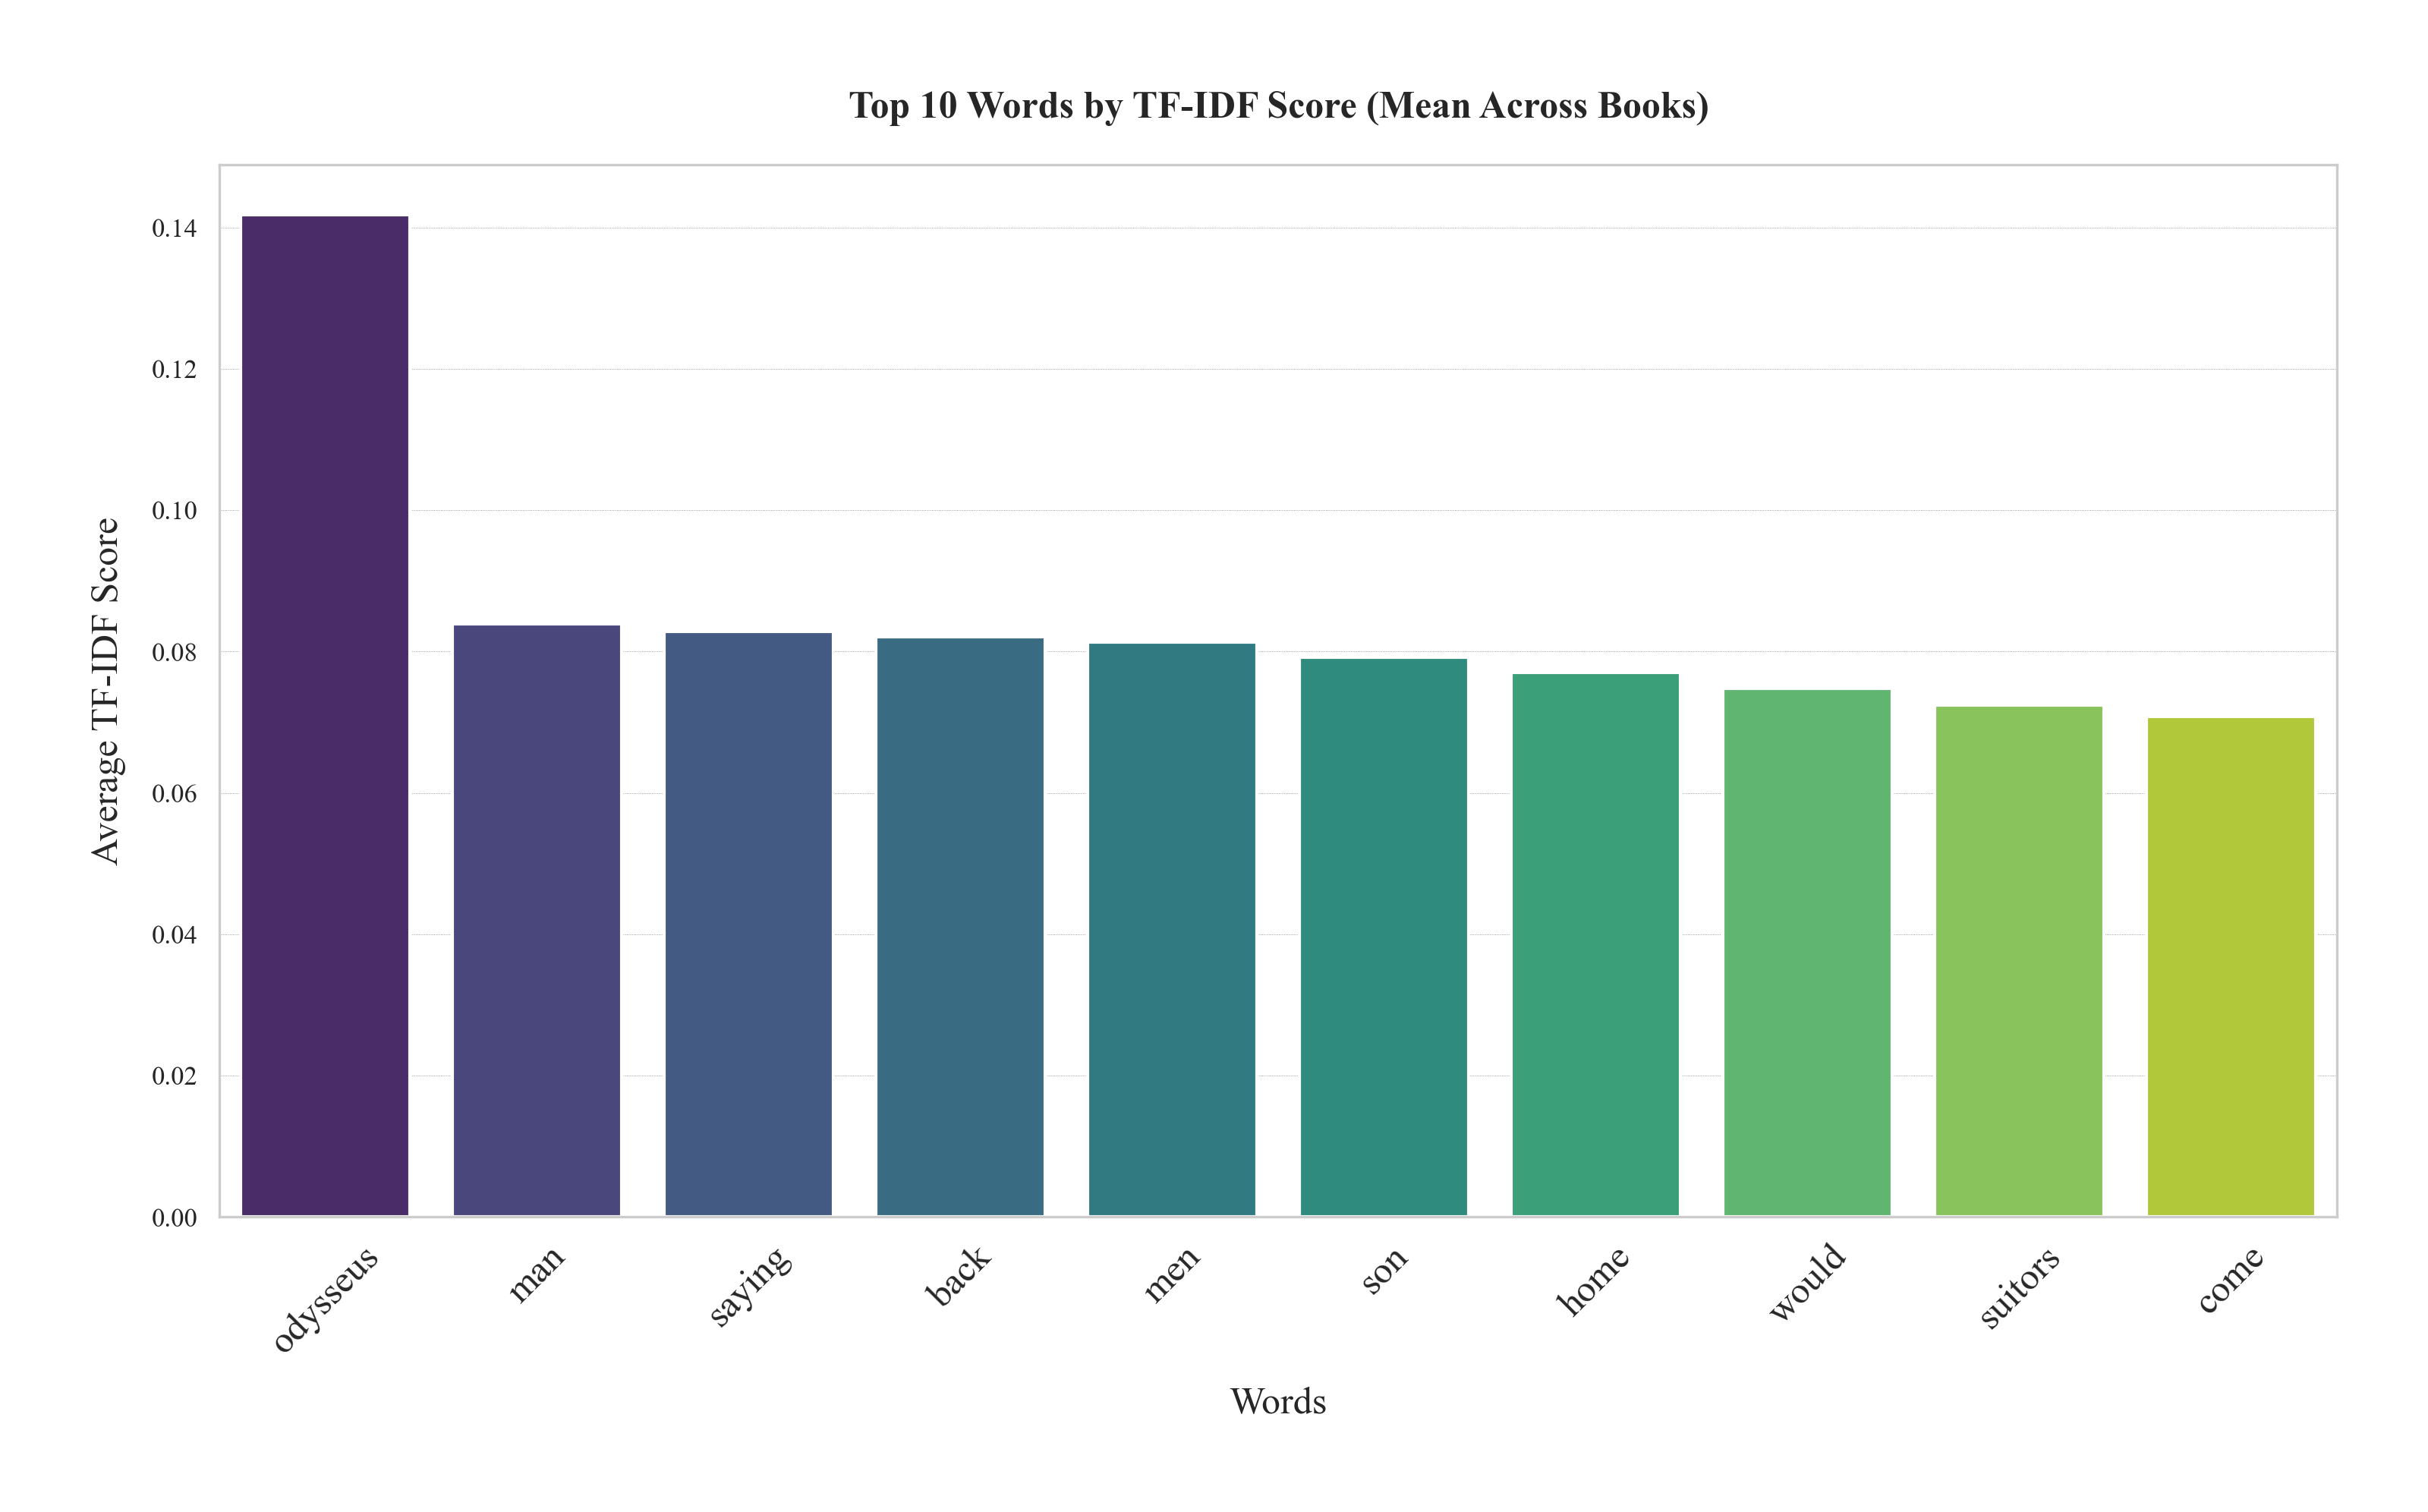

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=tfidf_top_words.index, y=tfidf_top_words.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Average TF-IDF Score")
plt.title("Top 10 Words by TF-IDF Score (Mean Across Books)")
plt.show()

In [66]:
from scipy import stats

# Ensure we're using the same vocabulary for both translations
common_vocab = list(set(tfidf_w_df.columns) & set(tfidf_g_df.columns))

# Extract matching words and ensure same column order
tfidf_w_common = tfidf_w_df[common_vocab].mean(axis=0).fillna(0)
tfidf_g_common = tfidf_g_df[common_vocab].mean(axis=0).fillna(0)

# Perform t-test on TF-IDF values of common words
t_stat, p_value = stats.ttest_ind(tfidf_w_common, tfidf_g_common)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference in TF-IDF scores between Wilson and Green is statistically significant.")
else:
    print("No significant difference in TF-IDF scores between Wilson and Green.")

NameError: name 'tfidf_w_df' is not defined

In [67]:
tfidf_w_df.head

NameError: name 'tfidf_w_df' is not defined

- 📊 **Parametric Hypothesis Testing:** Assessing significant variations.  

____________________________________________________
## 5️⃣ Discussion of Results  

After the three experiments and various statistical tests for each, it has been stablished, with statistical certainty, that lexicaly the translations maintain and analogous diversity. this fact supports the argument of a strong cultural sway in their translations. The sample of the present MVP analysis is too small to conclude with certainty anything, however, it proves that the method works and yields interesting insights.

### 🔎 **Findings:** Insights from experiments. 
* 
* 
* 
* 



### 🚀 **New Directions:** Refinements & future research steps.  

